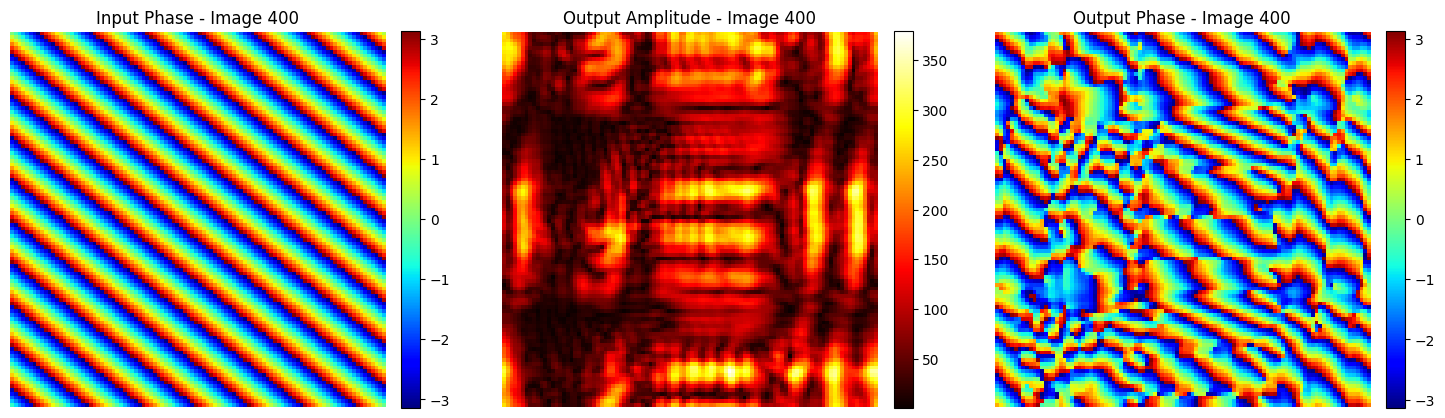

Displayed image 400


In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
from PIL import Image

import time
from IPython.display import display, clear_output

from google.colab import drive
drive.mount('/content/drive')

#%% Parameters
lmb = 532e-9 # Wavelength in vacuum
k = 2.0*np.pi/lmb # wave vetor
N = 100 # number of pixels
L = 25e-6 # detection field
n_basis = 437 # number of illumination

#%% Load illumination field, E_in
data_path = "/content/drive/MyDrive"
os.chdir(data_path)
input_data = np.load("input_data.npy")

#display the illumination field, E_in
for i in range(n_basis):
    if i % 40 == 0:  # Only display images every 10 iterations
        plt.figure(figsize=(12, 6))  # Specify a larger figure size for clarity

        plt.subplot(1, 2, 1)
        im = plt.imshow(np.abs(input_data[i, :, :]), cmap='gray', vmin=0, vmax=1.2*np.max(np.abs(input_data[i, :, :])))
        plt.title(f'Input amplitude - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im, orientation='vertical', fraction=0.046, pad=0.04)  # Add a color bar to the amplitude plot

        plt.subplot(1, 2, 2)
        im_phase = plt.imshow(np.angle(input_data[i, :, :]), cmap='jet')
        plt.title(f'Input phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_phase, orientation='vertical', fraction=0.046, pad=0.04)  # Add a color bar to the phase plot

        plt.show()
        time.sleep(0.5)  # Pause for 0.5 seconds between images
        clear_output(wait=True)  # Clear the output to prepare for the next image

# Upload object function and output aberration
Object = np.array(Image.open("USAF1000.png"))
Object = Object[(np.size(Object,1)-N)//2:(np.size(Object,1)+N)//2,(np.size(Object,1)-N)//2:(np.size(Object,1)+N)//2]

output_aberration_phase = np.loadtxt("output_aberration_phase.txt")
output_aberration_amp = np.loadtxt("output_aberration_amp.txt")
output_aberration = output_aberration_amp * np.exp(1j*output_aberration_phase)

# Visualization of aberrations
plt.figure(figsize=(12, 6))  # Set figure size
plt.subplot(1, 2, 1)
im_aberration_amp = plt.imshow(output_aberration_amp, cmap='hot')
plt.title('Aberration Amplitude')
plt.gca().set_axis_off()
plt.colorbar(im_aberration_amp, orientation='vertical', fraction=0.046, pad=0.04)

plt.subplot(1, 2, 2)
im_aberration_phase = plt.imshow(output_aberration_phase, cmap='hsv')
plt.title('Aberration Phase')
plt.gca().set_axis_off()
plt.colorbar(im_aberration_phase, orientation='vertical', fraction=0.046, pad=0.04)  # Adding a color bar

plt.show()

#%% FFT functions
def _FT(x):
    return np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(x)))

def _iFT(x):
    return np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(x)))

#%% Data Generation using a forward model
output_list = []
for i in range(n_basis):
  E = input_data[i]
  E = E * Object
  fE = _FT(E)
  fE = fE * output_aberration
  E = _iFT(fE)
  output_list.append(E)

#%% Save Data - Google Drive
output_arr = np.array(output_list)
np.save('output_data.npy',output_arr)

#%% Data Visualization
for i in range(n_basis):
    if i % 40 == 0:  # Only process every 40th image
        plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

        # Plot for Input Phase
        plt.subplot(1, 3, 1)
        im_input_phase = plt.imshow(np.angle(input_data[i]), cmap='jet')
        plt.title(f'Input Phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_input_phase, orientation='vertical', fraction=0.046, pad=0.04)

        # Plot for Output Amplitude
        plt.subplot(1, 3, 2)
        im_output_amp = plt.imshow(np.abs(output_arr[i]), cmap='hot')
        plt.title(f'Output Amplitude - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_output_amp, orientation='vertical', fraction=0.046, pad=0.04)

        # Plot for Output Phase
        plt.subplot(1, 3, 3)
        im_output_phase = plt.imshow(np.angle(output_arr[i]), cmap='jet')
        plt.title(f'Output Phase - Image {i}')
        plt.gca().set_axis_off()
        plt.colorbar(im_output_phase, orientation='vertical', fraction=0.046, pad=0.04)

        plt.show()
        print(f"Displayed image {i}")  # Print statement to confirm each display
        time.sleep(0.5)  # Pause for 0.5 seconds between images
        clear_output(wait=True)  # Clear the output to prepare for the next image


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50, Loss: 15075.156124359228
Epoch 2/50, Loss: 15053.265014844337
Epoch 3/50, Loss: 14974.432204144152
Epoch 4/50, Loss: 14819.267738301183
Epoch 5/50, Loss: 14577.607691384917
Epoch 6/50, Loss: 14244.427462153135
Epoch 7/50, Loss: 13823.002667831553
Epoch 8/50, Loss: 13316.9897572428
Epoch 9/50, Loss: 12738.873400417242
Epoch 10/50, Loss: 12101.032904795873
Epoch 11/50, Loss: 11416.214541596126
Epoch 12/50, Loss: 10700.715215588965
Epoch 13/50, Loss: 9964.509360336726
Epoch 14/50, Loss: 9221.54198399629
Epoch 15/50, Loss: 8483.716537201532
Epoch 16/50, Loss: 7759.404909666139
Epoch 17/50, Loss: 7058.700656573937
Epoch 18/50, Loss: 6384.768938406188
Epoch 19/50, Loss: 5749.081140365912
Epoch 20/50, Loss: 5149.6709499812805
Epoch 21/50, Loss: 4592.189423145277
Epoch 22/50, Loss: 4078.1481996285033
Epoch 23/50, Loss: 3606.563133853165
Epoch 24/50, Loss:

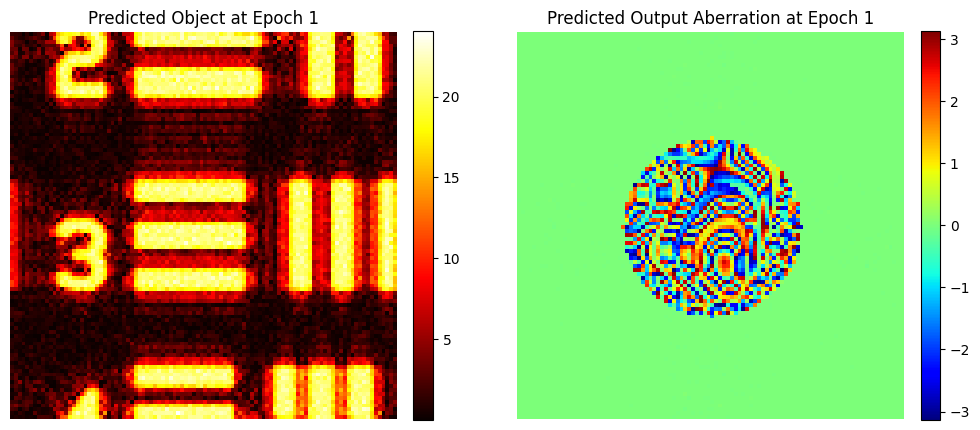

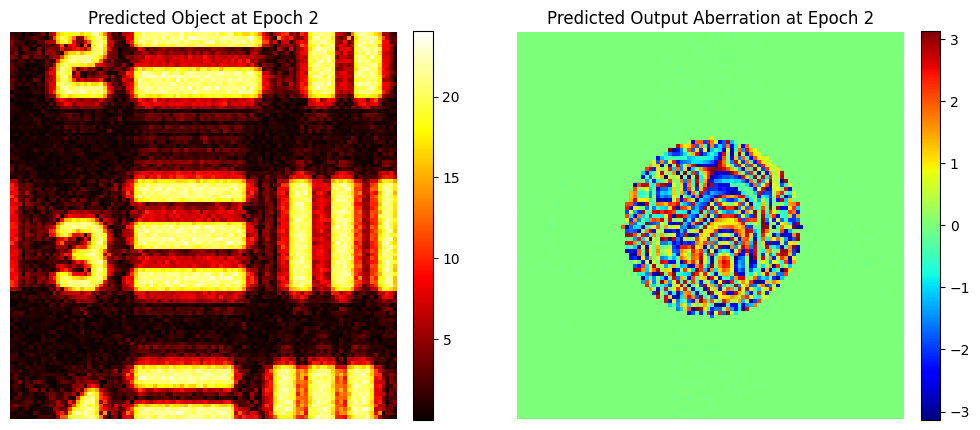

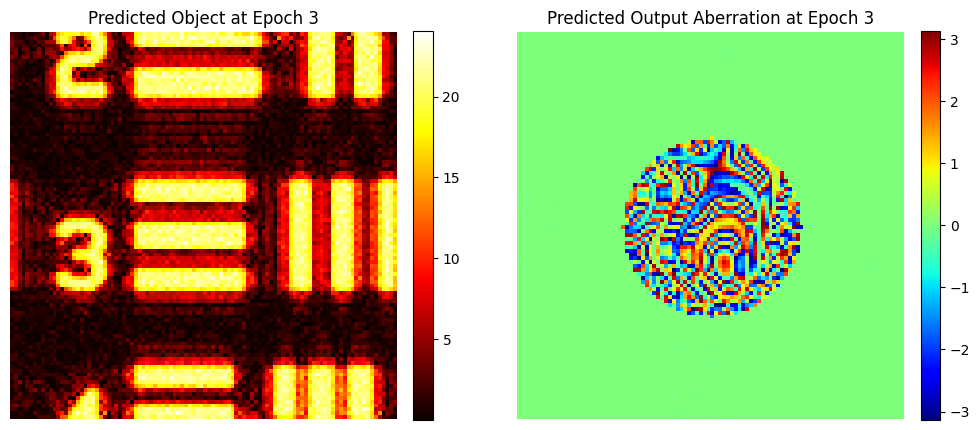

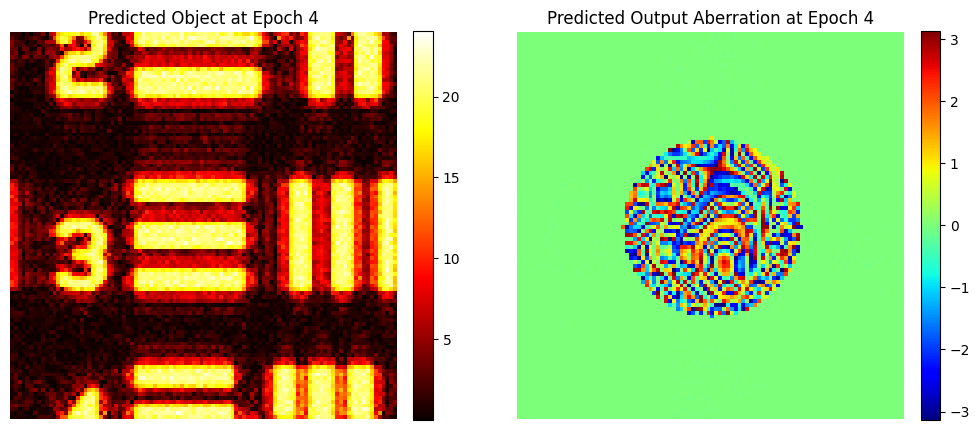

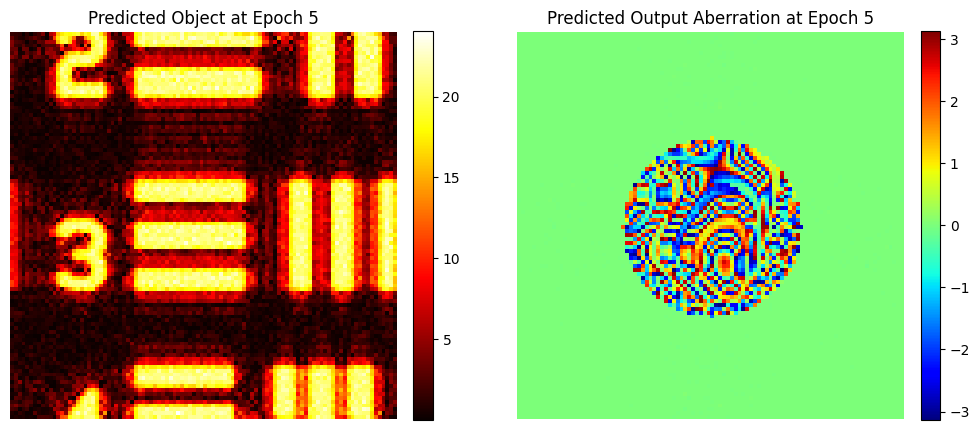

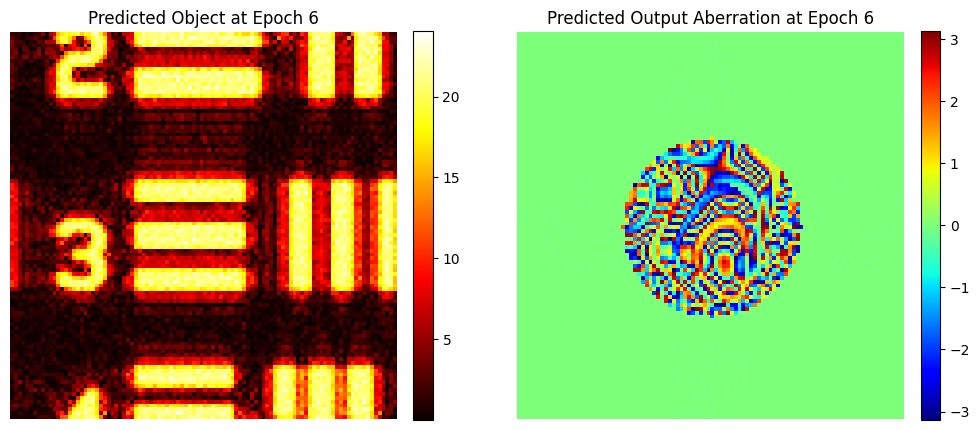

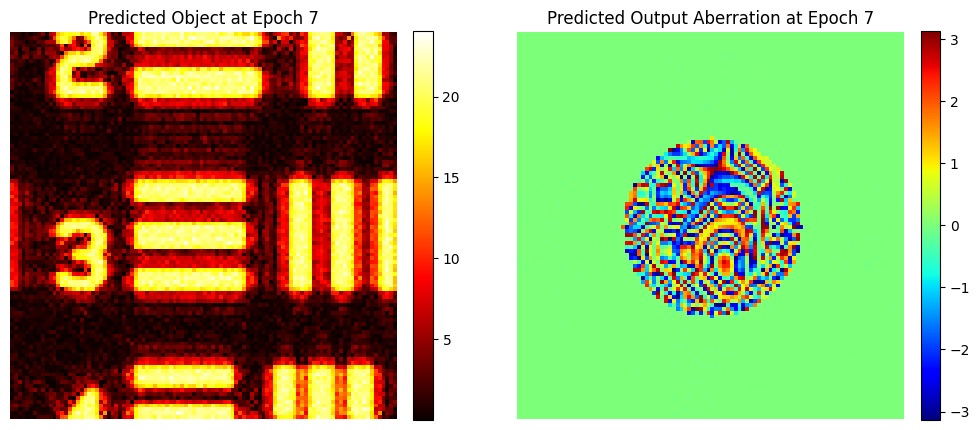

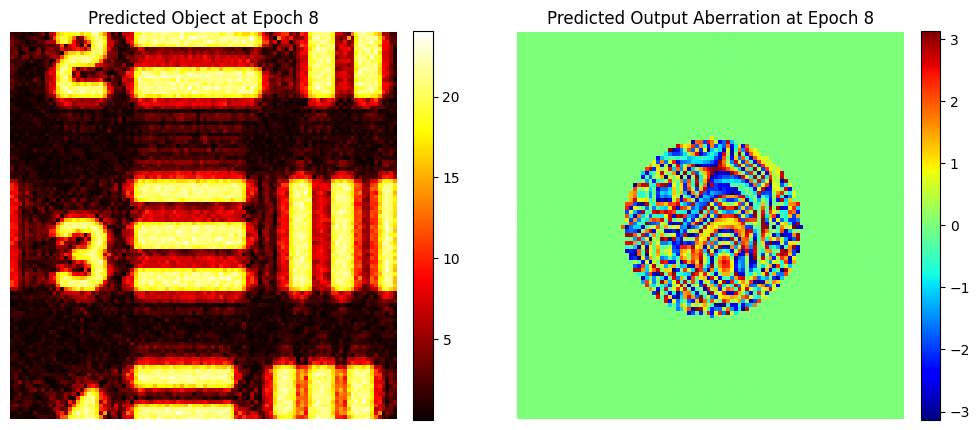

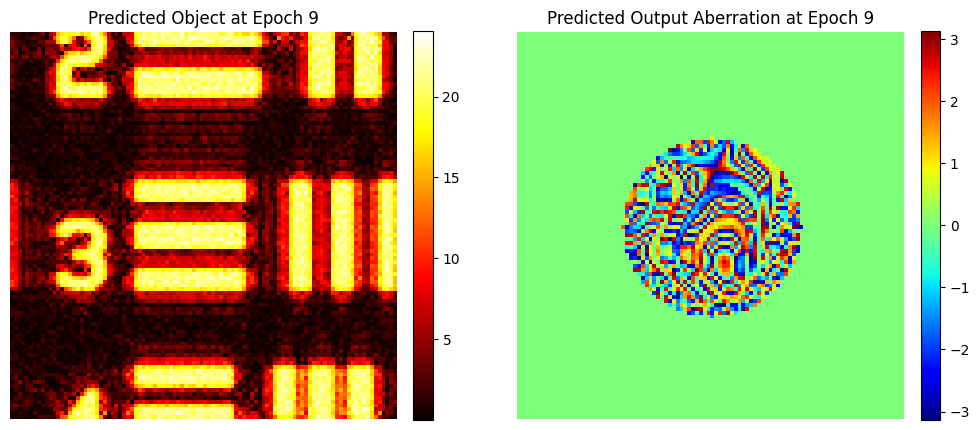

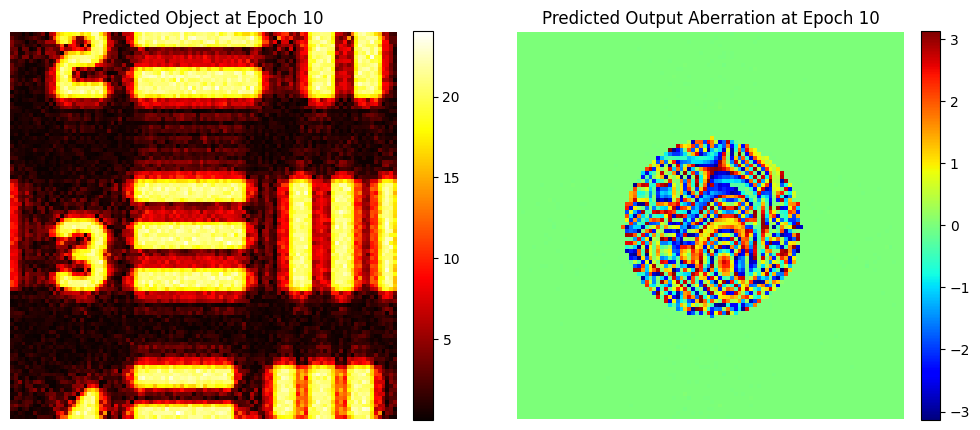

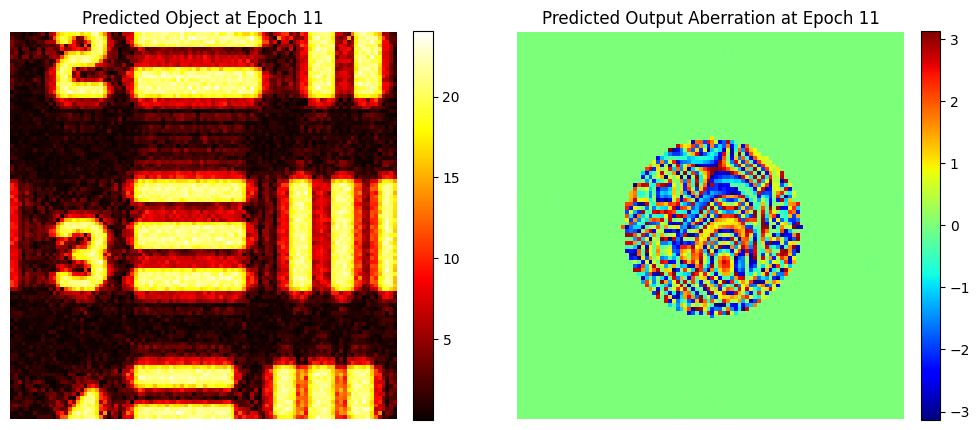

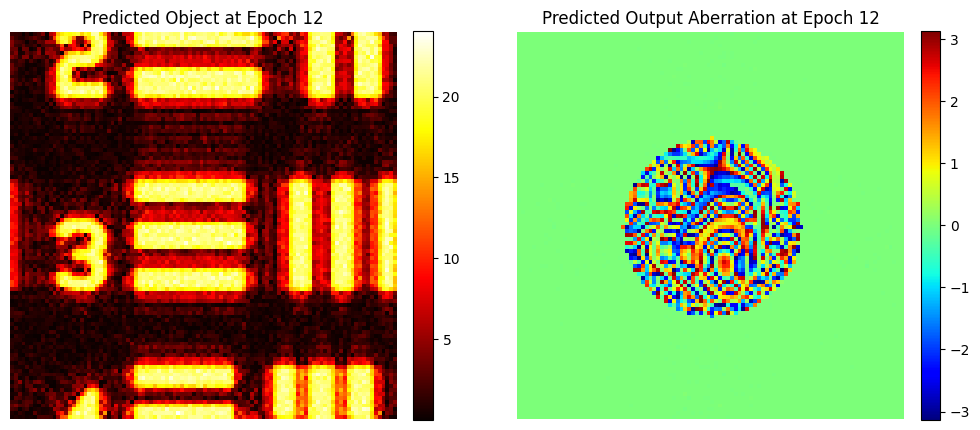

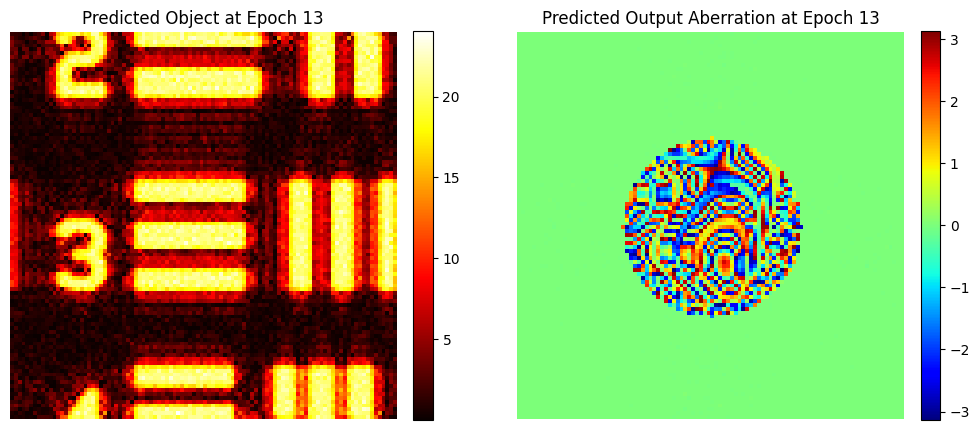

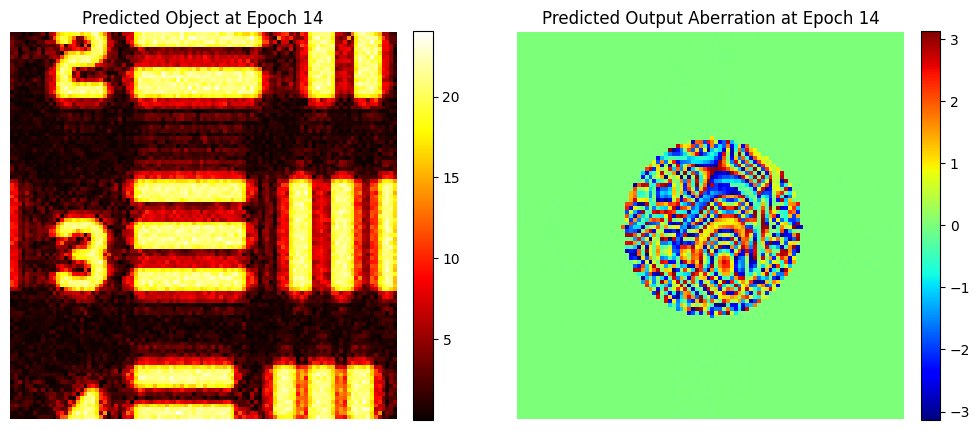

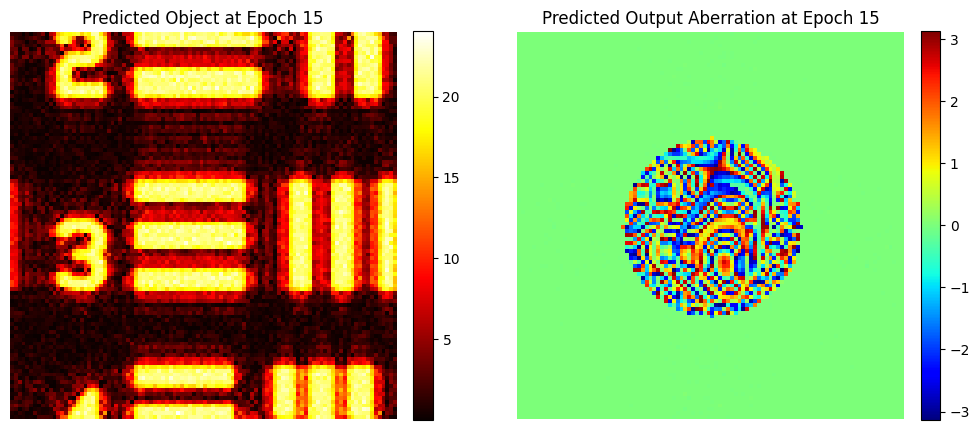

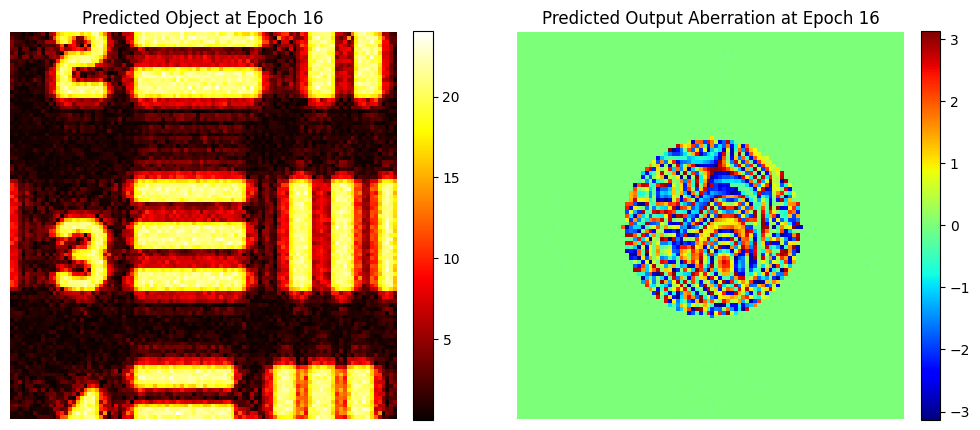

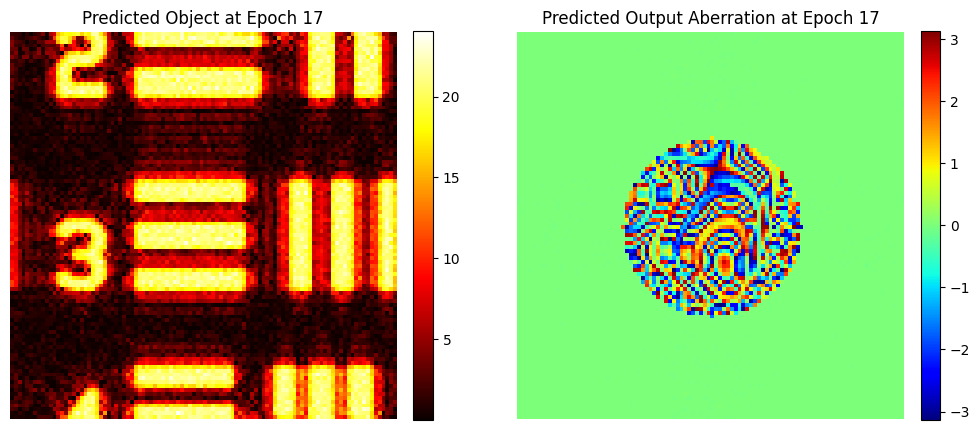

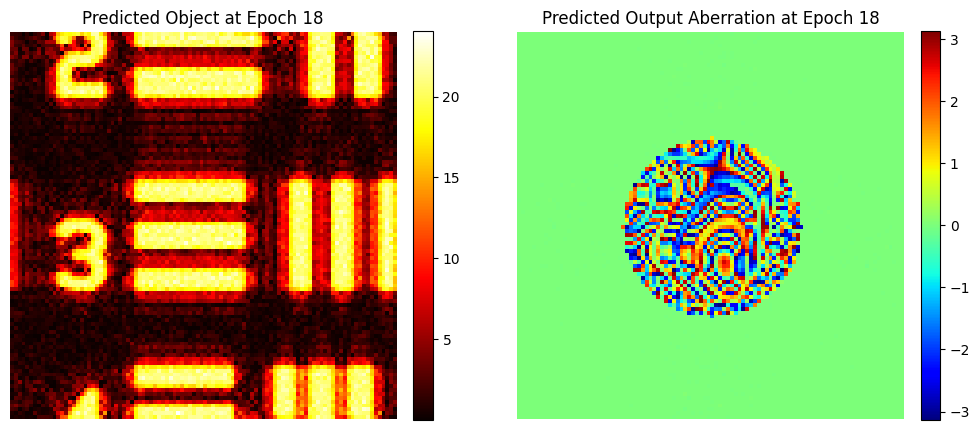

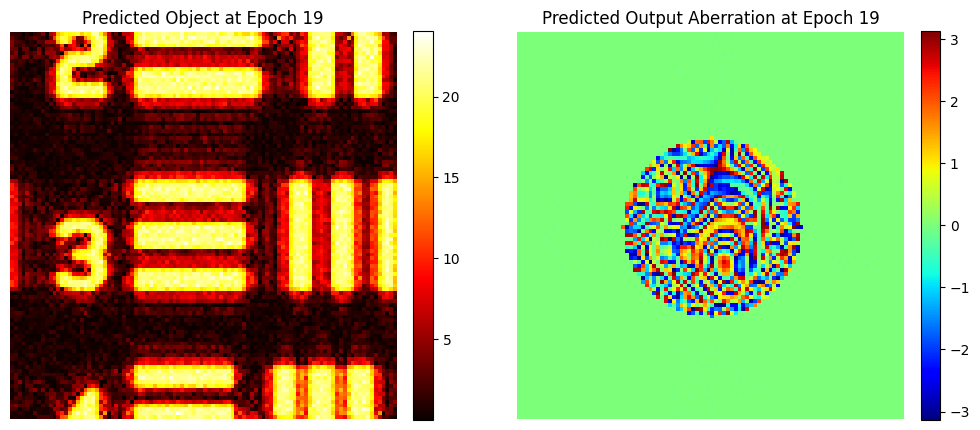

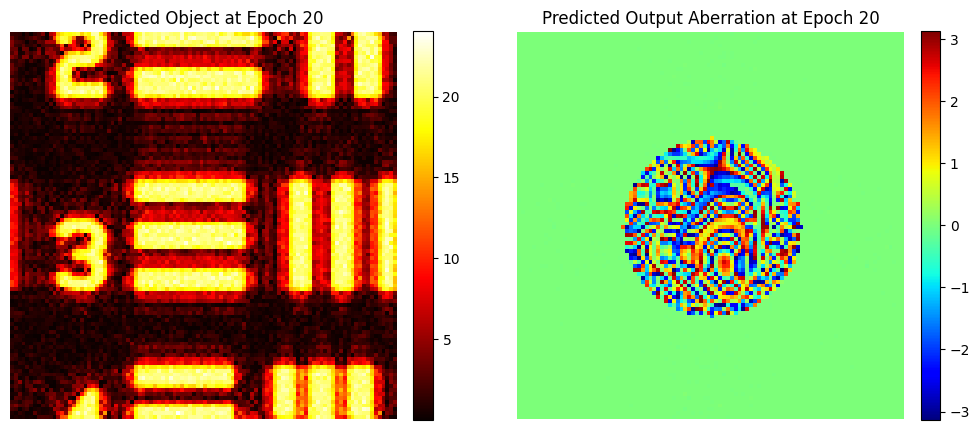

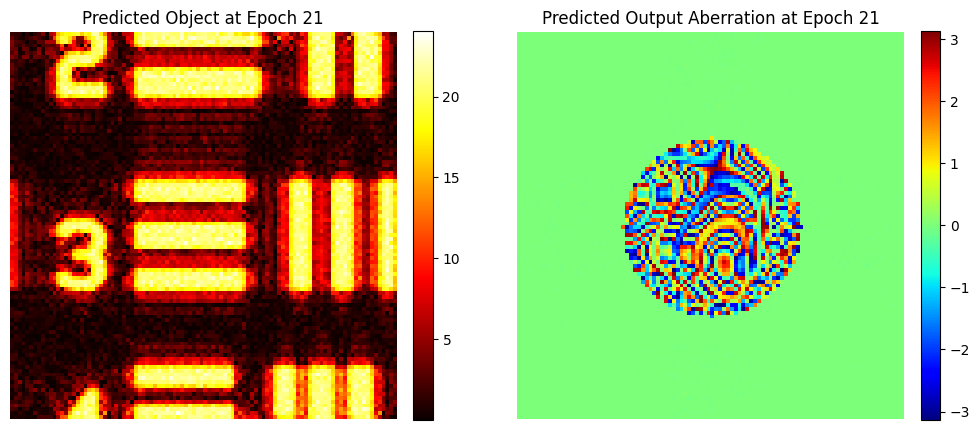

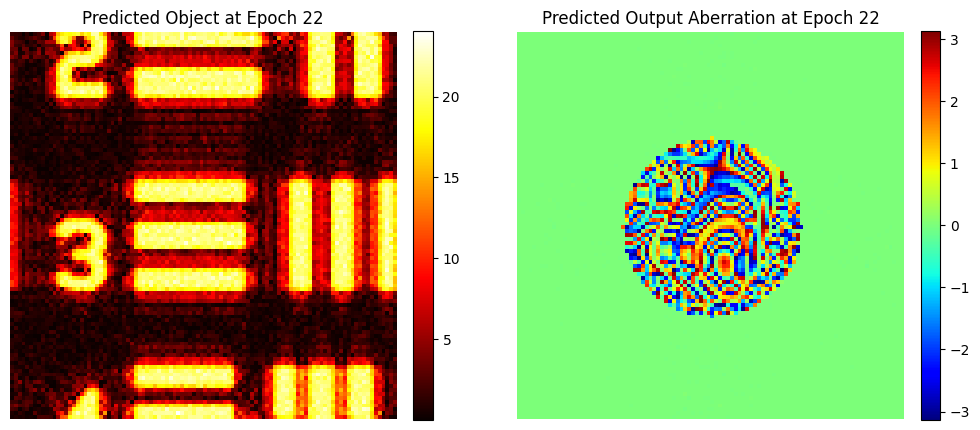

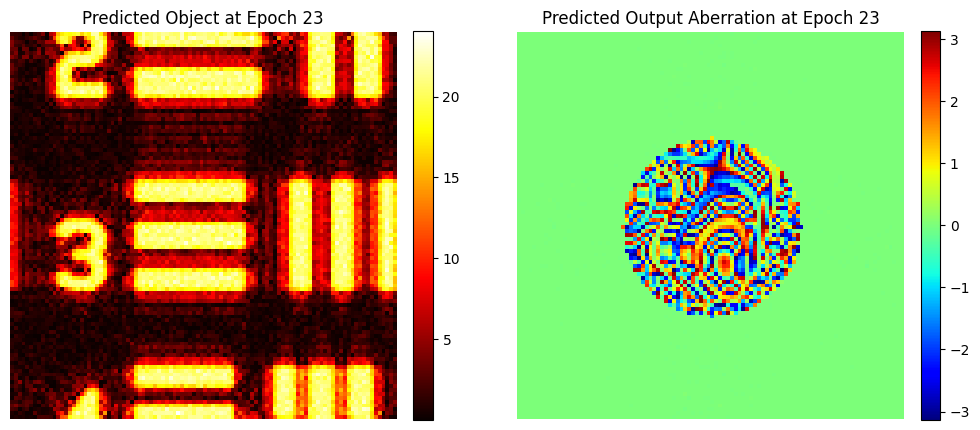

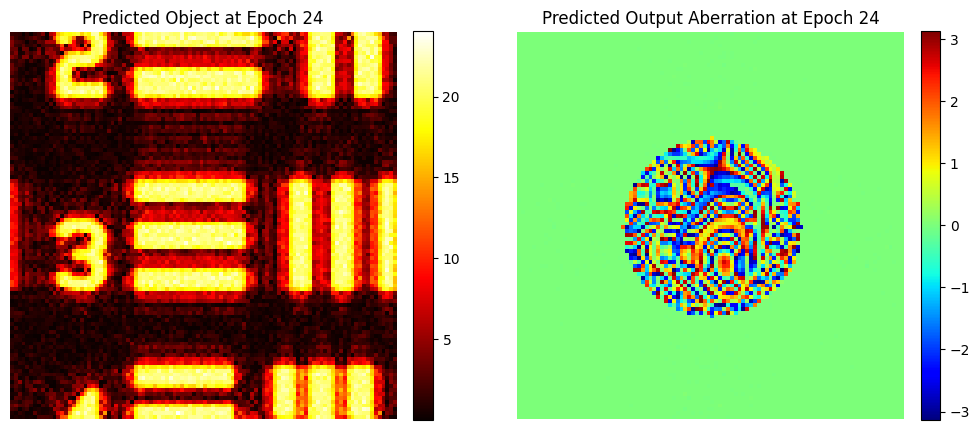

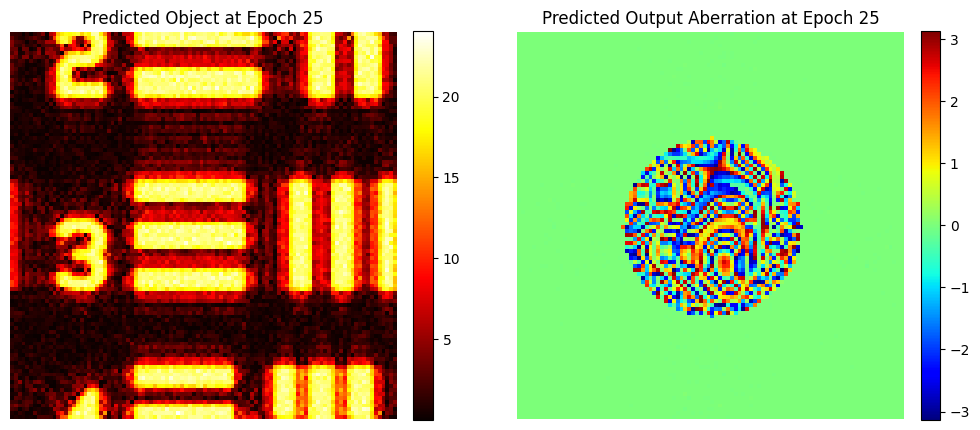

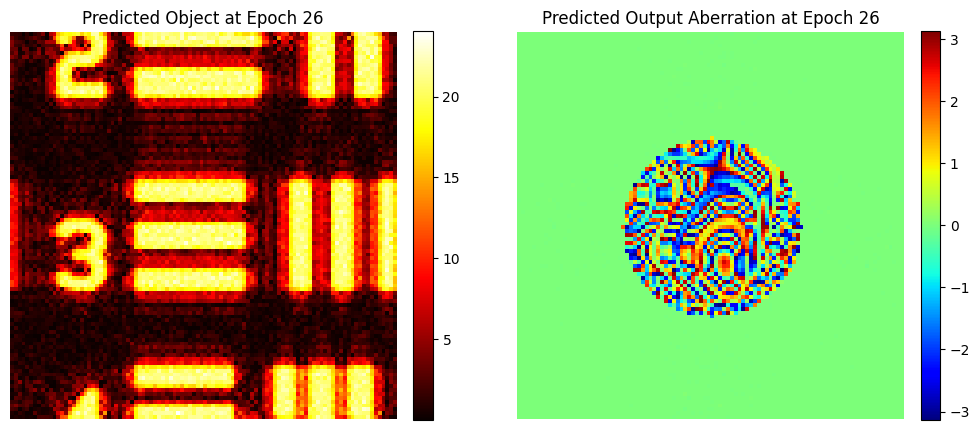

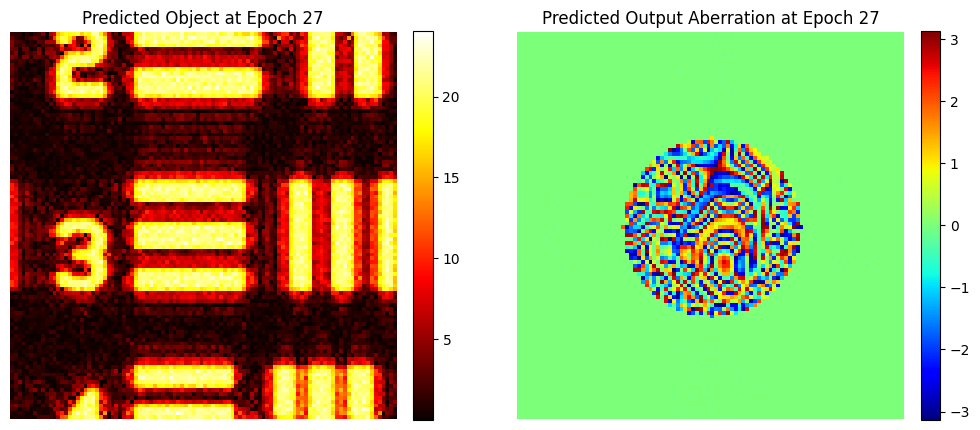

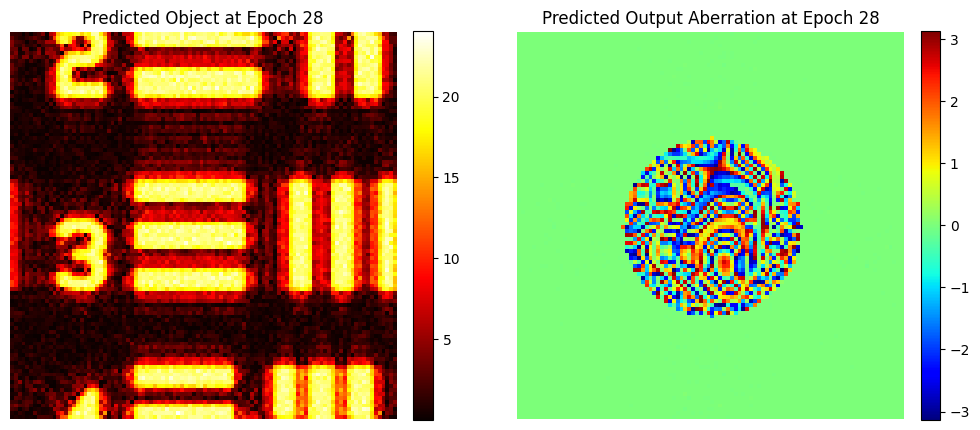

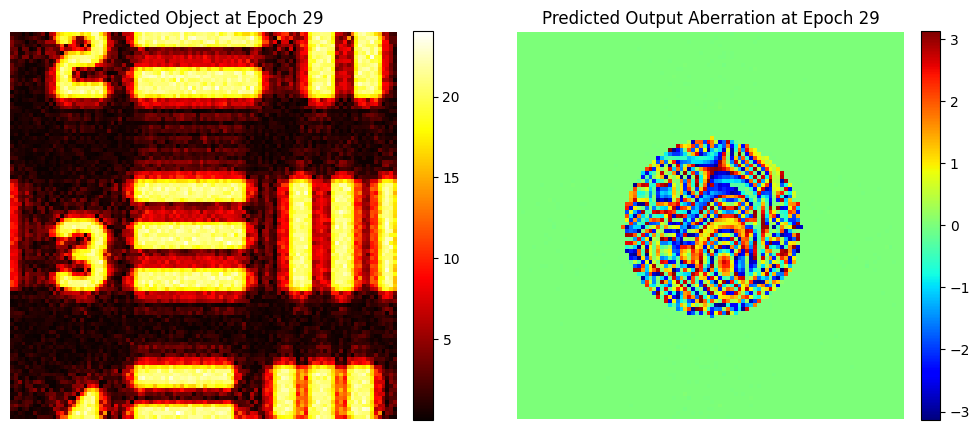

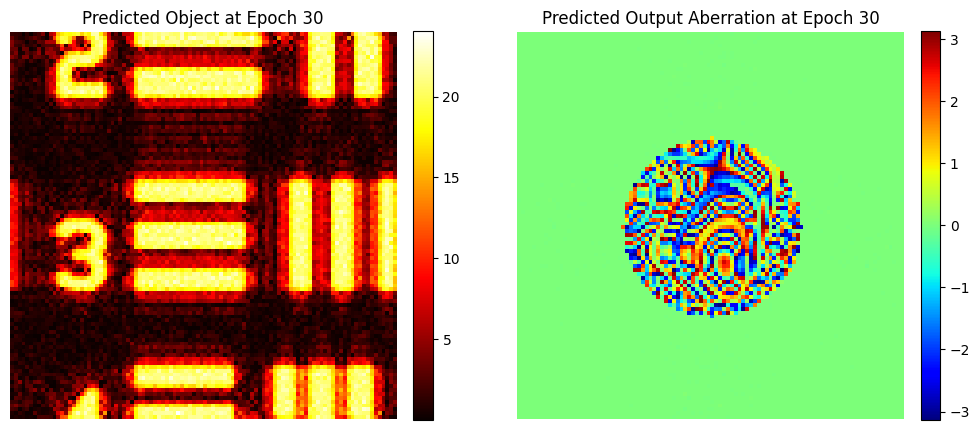

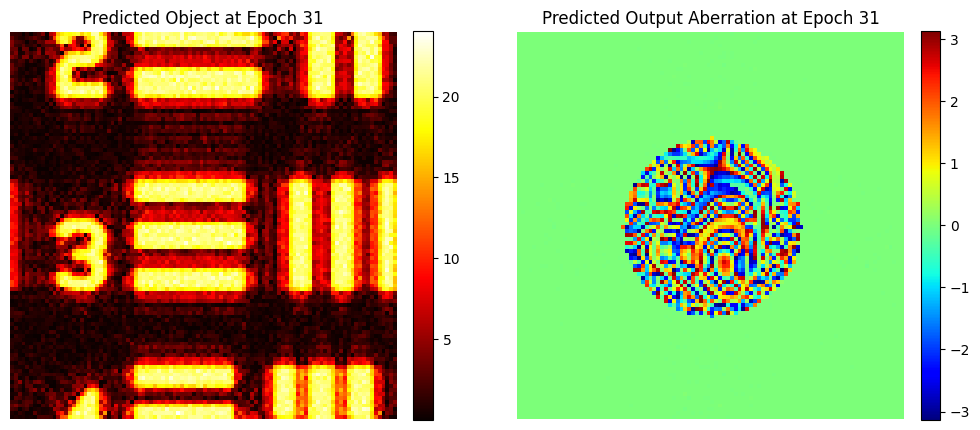

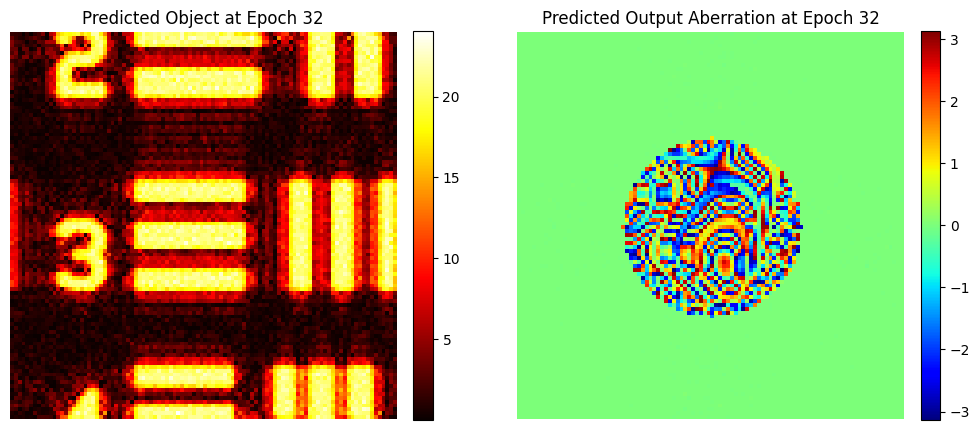

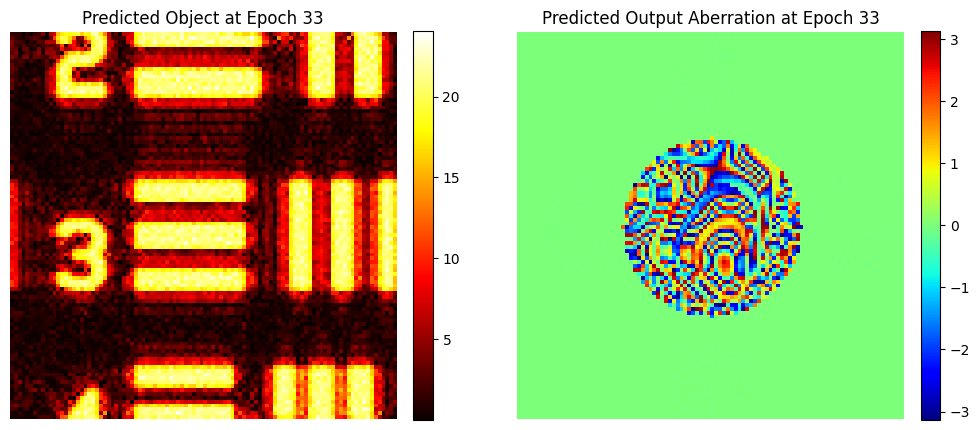

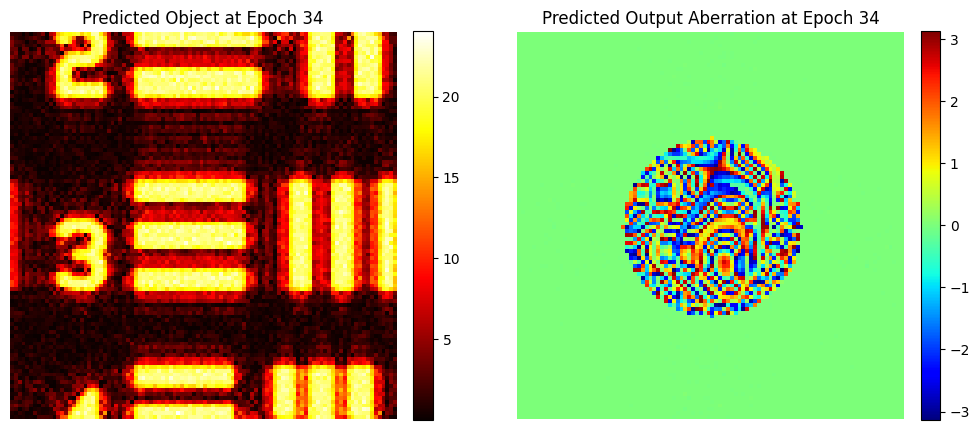

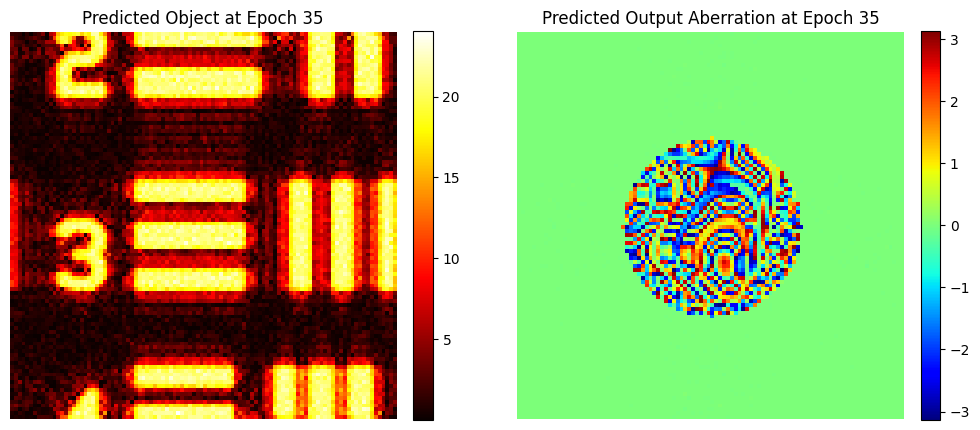

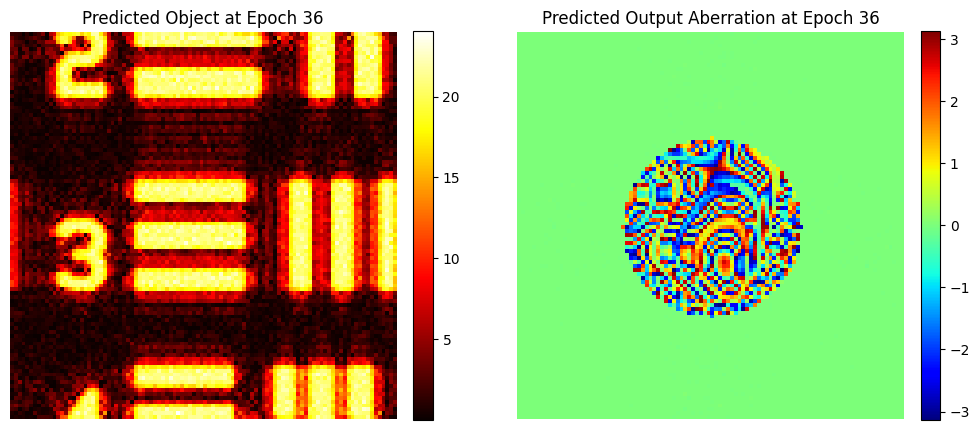

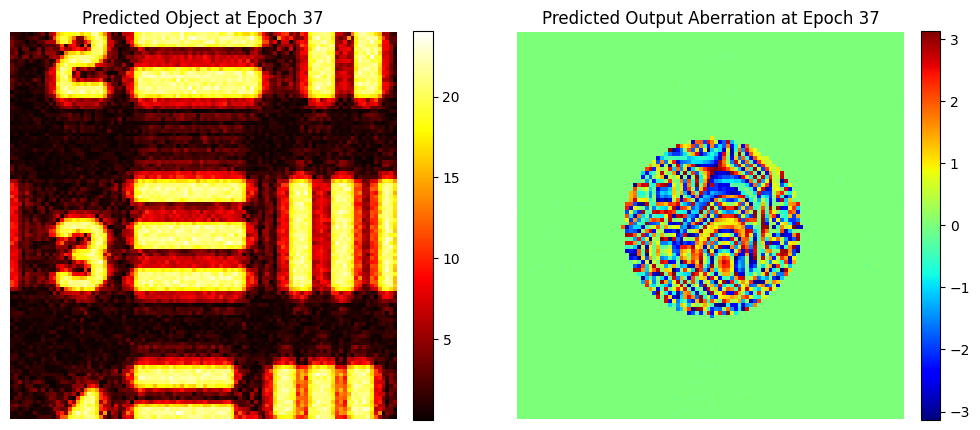

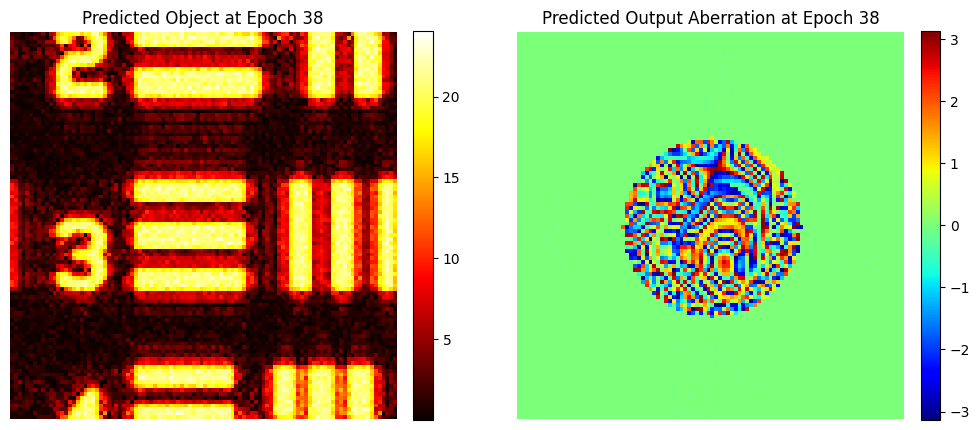

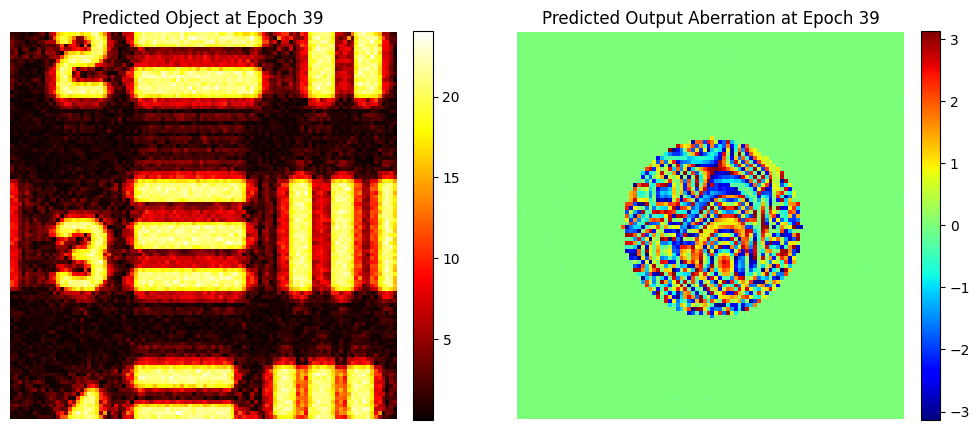

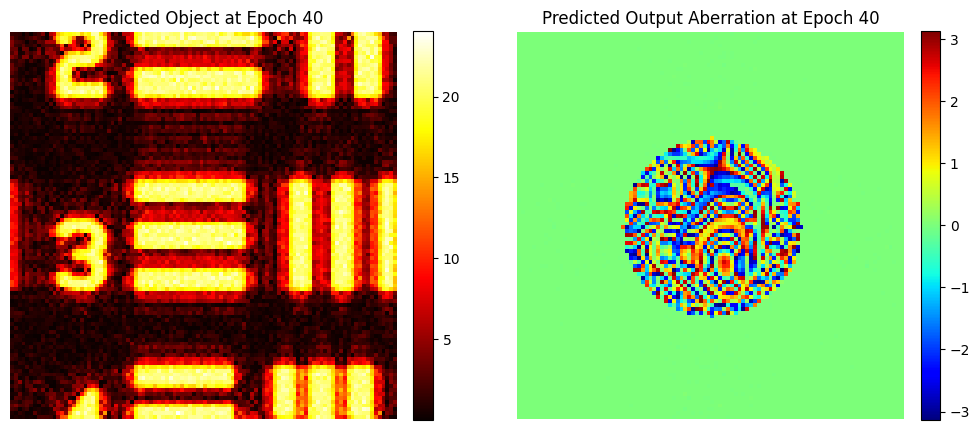

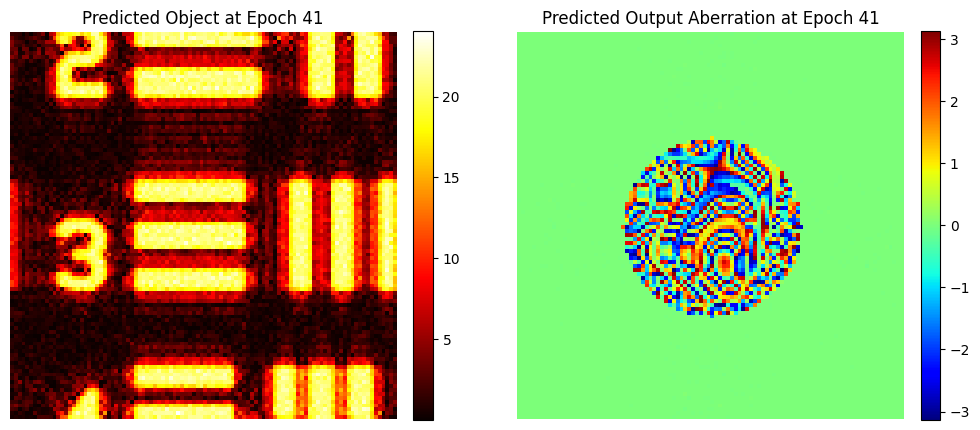

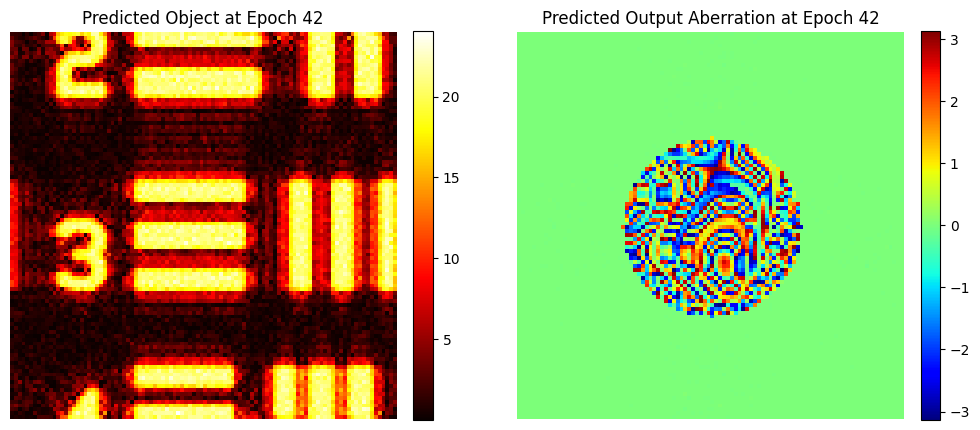

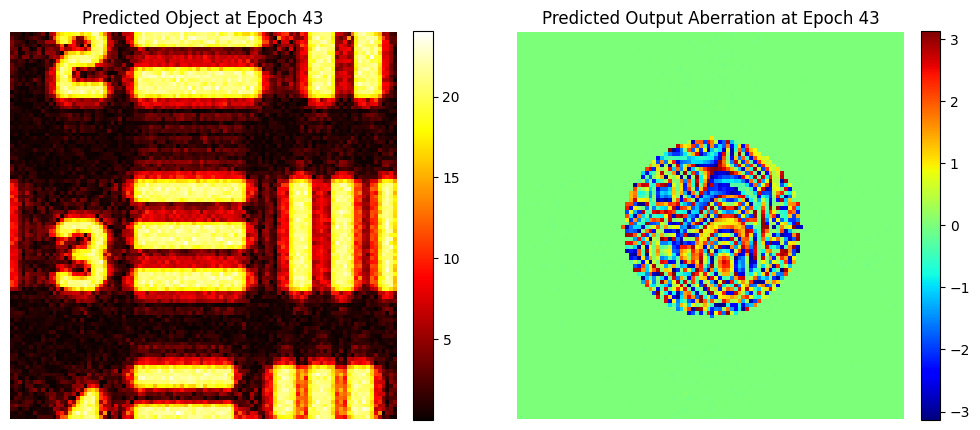

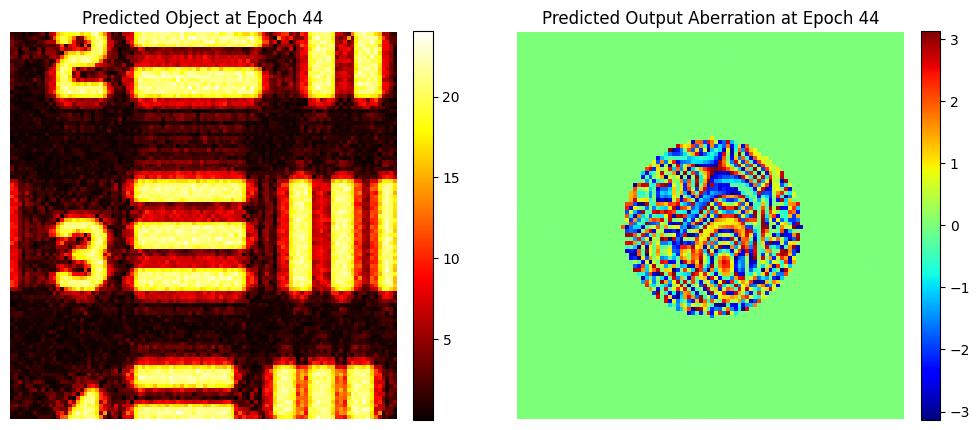

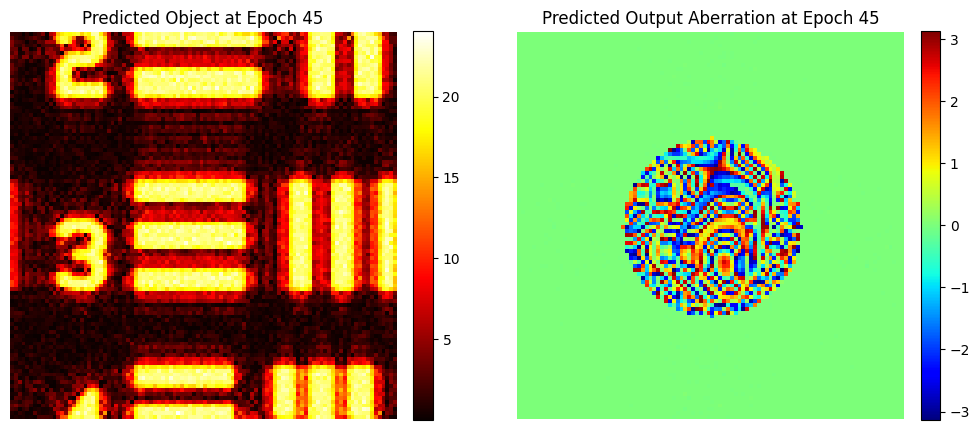

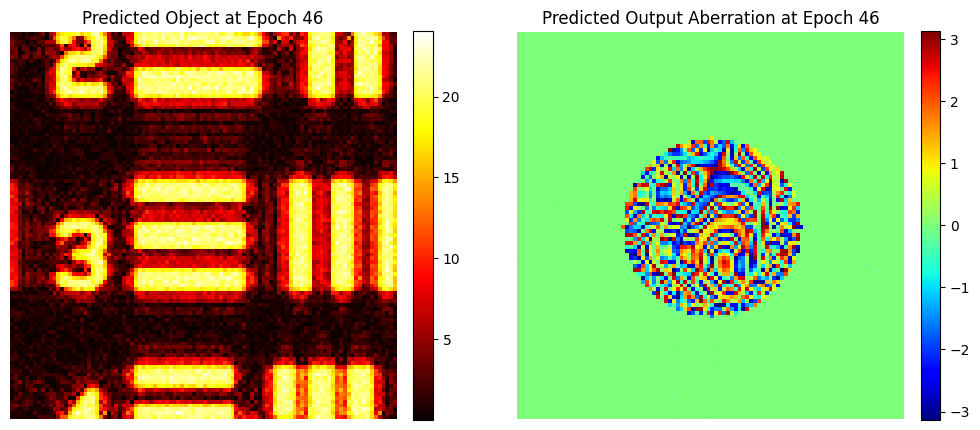

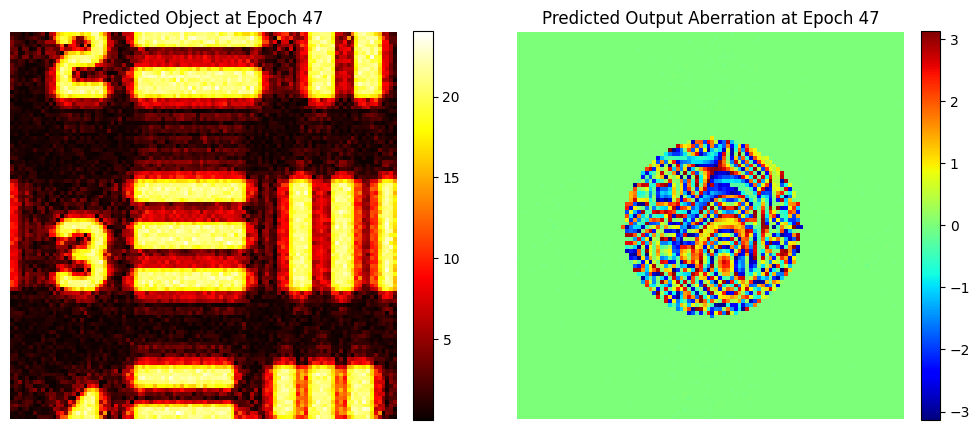

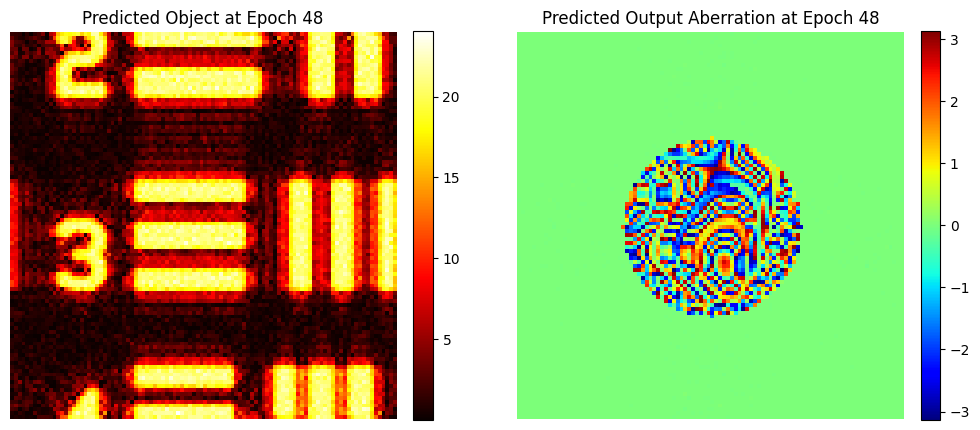

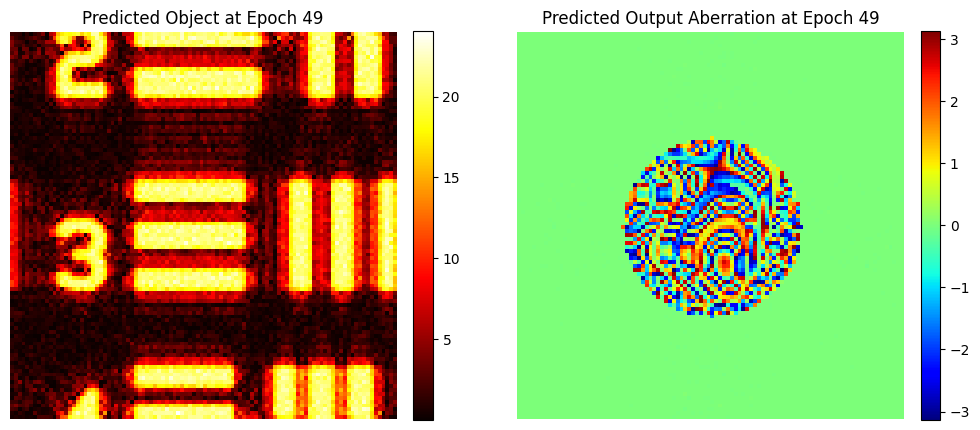

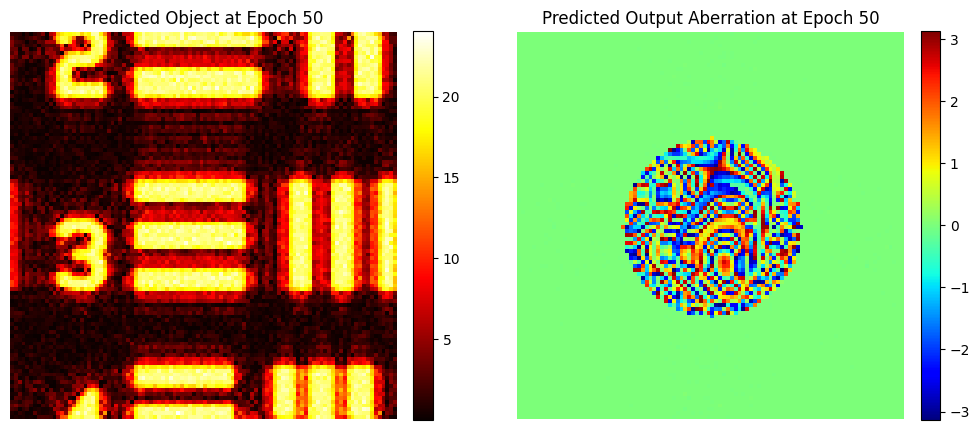

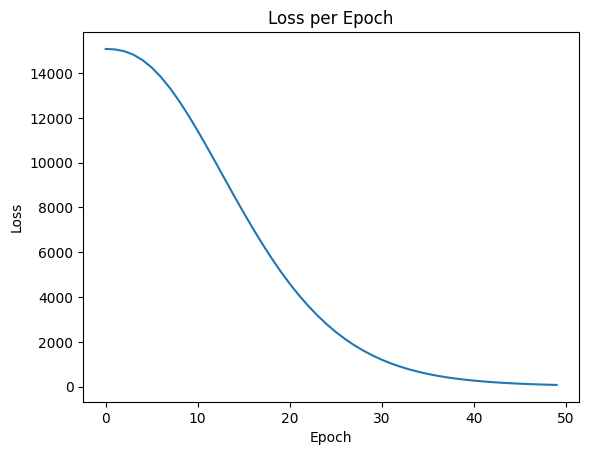

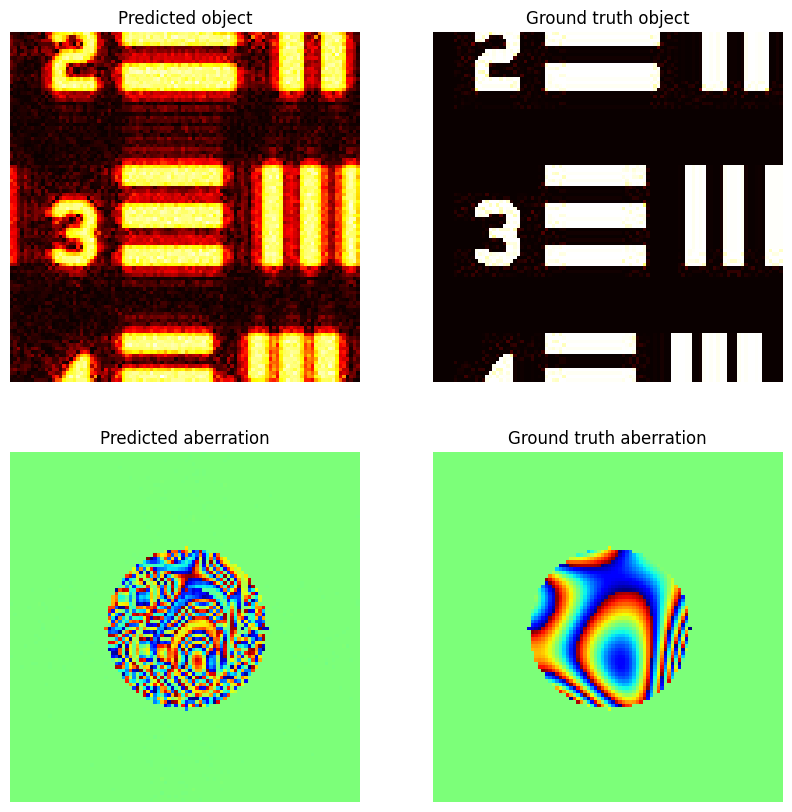

In [ ]:
import numpy as np

import os

from matplotlib import pyplot as plt

import torch

from torch import nn

from torch.utils.data import DataLoader, TensorDataset

from PIL import Image

from IPython.display import clear_output

from google.colab import drive
drive.mount('/content/drive')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

#%% Parameters

lmb = 532e-9 # Wavelength in vacuum

k = 2.0*torch.pi/lmb # wave vector

N = 100 # number of pixels

L = 25e-6 # detection field

n_basis = 437
batch_size = 20
lr = 0.02
num_epoch = 50
R1 = 1e-3

#%% FFT functions

def _FT(x):
    return torch.fft.ifftshift(torch.fft.fft2(torch.fft.fftshift(x)))

def _iFT(x):
    return torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(x)))

#%% Training Data - Google Drive

data_path = "/content/drive/MyDrive/"

os.chdir(data_path)

Input_ = np.load('input_data.npy')[0:n_basis]

Output_ = np.load('output_data.npy')

Input_ = torch.tensor(Input_)
Output_ = torch.tensor(Output_)

dataset = TensorDataset(Input_, Output_)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#%% Ground truth

Object_gt = np.array(Image.open('USAF1000.png'))

Object_gt = Object_gt[(np.size(Object_gt,1)-N)//2:(np.size(Object_gt,1)+N)//2,(np.size(Object_gt,1)-N)//2:(np.size(Object_gt,1)+N)//2]

output_aberration_phase = np.loadtxt('output_aberration_phase.txt')

output_aberration_amp = np.loadtxt('output_aberration_amp.txt')

output_aberration_gt = output_aberration_amp * np.exp(1.0j*output_aberration_phase)

#%% Model

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.Object = nn.Parameter(torch.randn(N,N))
        self.output_aberration = nn.Parameter(torch.randn((N,N), dtype=torch.complex64))

    def forward(self, E_in):
        E = E_in * self.Object
        fE = _FT(E)
        fE = fE * self.output_aberration
        E_out = _iFT(fE)
        return E_out

    def Object_(self):
        return self.Object

    def output_aberration_(self):
        return self.output_aberration

#%% Loss function

def loss_fn(E_out, E_true):
    # Calculate the standard loss
    mse_loss = torch.mean(torch.abs(E_out - E_true)**2)

    # Calculate gradient of aberration
    grad_output_aberration = torch.gradient(m.output_aberration_())

    # Compute the norm of the gradients (summing the squared gradients from the tuple)
    grad_norm = sum(torch.abs(g)**2 for g in grad_output_aberration)

    # Combine losses
    return mse_loss + R1 * torch.mean(grad_norm)

#%% Training loop

m = Model().to(device)
optimizer = torch.optim.Adam(m.parameters(), lr=lr)

loss_hist = []

for epoch in range(num_epoch):
    running_loss = 0.0
    for batch_idx, (E_in_batch, E_true_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        E_in_batch = E_in_batch.to(device)
        E_true_batch = E_true_batch.to(device)
        E_out_batch = m(E_in_batch)
        loss = loss_fn(E_out_batch, E_true_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_hist.append(running_loss / len(dataloader))
    print(f'Epoch {epoch + 1}/{num_epoch}, Loss: {running_loss / len(dataloader)}')

#%% Visualization

# Plot predicted object and aberration
for epoch in range(num_epoch):
    plt.figure(figsize=(12, 6))

    # Plot the predicted object
    ax1 = plt.subplot(1, 2, 1)
    predicted_object = abs(m.Object_()).cpu().detach().numpy()
    im1 = plt.imshow(predicted_object, cmap='hot')
    plt.title(f'Predicted Object at Epoch {epoch + 1}')
    plt.gca().set_axis_off()
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    # Plot the predicted output aberration
    ax2 = plt.subplot(1, 2, 2)
    predicted_aberration = np.exp(1.0j * m.output_aberration_().cpu().detach().numpy())
    im2 = plt.imshow(np.angle(predicted_aberration), cmap='jet')
    plt.title(f'Predicted Output Aberration at Epoch {epoch + 1}')
    plt.gca().set_axis_off()
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

    plt.show()

# Plot the overall loss history

plt.plot(loss_hist)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot final predictions vs ground truth

plt.figure(figsize=(10, 10))

# Subplot for Predicted Object
plt.subplot(2, 2, 1)
plt.imshow(abs(m.Object_()).cpu().detach().numpy(), cmap='hot')
plt.title('Predicted object')
plt.gca().set_axis_off()

# Subplot for Ground Truth Object
plt.subplot(2, 2, 2)
plt.imshow(Object_gt, cmap='hot')
plt.title('Ground truth object')
plt.gca().set_axis_off()

# Subplot for Predicted Aberration
abo = np.exp(1.0j * m.output_aberration_().cpu().detach().numpy())
plt.subplot(2, 2, 3)
plt.imshow(np.angle(abo), cmap='jet')
plt.title('Predicted aberration')
plt.gca().set_axis_off()

# Subplot for Ground Truth Aberration
plt.subplot(2, 2, 4)
plt.imshow(np.angle(output_aberration_gt), cmap='jet')
plt.title('Ground truth aberration')
plt.gca().set_axis_off()

# Display all subplots
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Epoch 1/50, Loss: 15136.56192294034
Epoch 2/50, Loss: 15077.820179332386
Epoch 3/50, Loss: 15071.828346946022
Epoch 4/50, Loss: 15071.90292080966
Epoch 5/50, Loss: 15074.680442116478
Epoch 6/50, Loss: 15073.152521306818
Epoch 7/50, Loss: 15070.123180042614
Epoch 8/50, Loss: 15070.126242897728
Epoch 9/50, Loss: 15065.694380326704
Epoch 10/50, Loss: 15048.755859375
Epoch 11/50, Loss: 14855.827414772728
Epoch 12/50, Loss: 14028.605690696022
Epoch 13/50, Loss: 13275.870427911932
Epoch 14/50, Loss: 12354.69442471591
Epoch 15/50, Loss: 12150.562943892046
Epoch 16/50, Loss: 12027.315252130682
Epoch 17/50, Loss: 12106.80233487216
Epoch 18/50, Loss: 11912.282581676136
Epoch 19/50, Loss: 12279.526988636364
Epoch 20/50, Loss: 11875.72354403409
Epoch 21/50, Loss: 11688.234241832386
Epoch 22/50, Loss: 11432.195268110796
Epoch 23/50, Loss: 11712.70672052

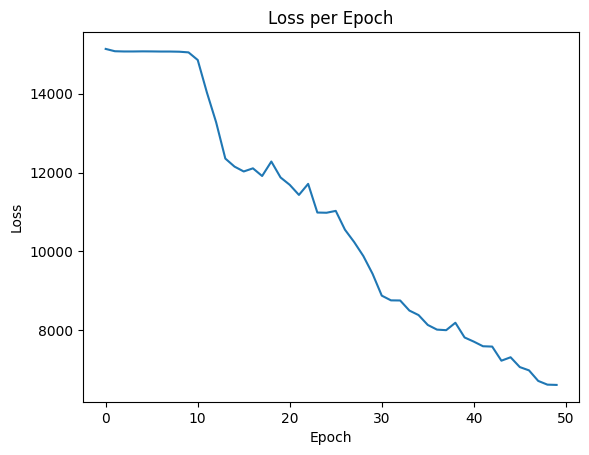

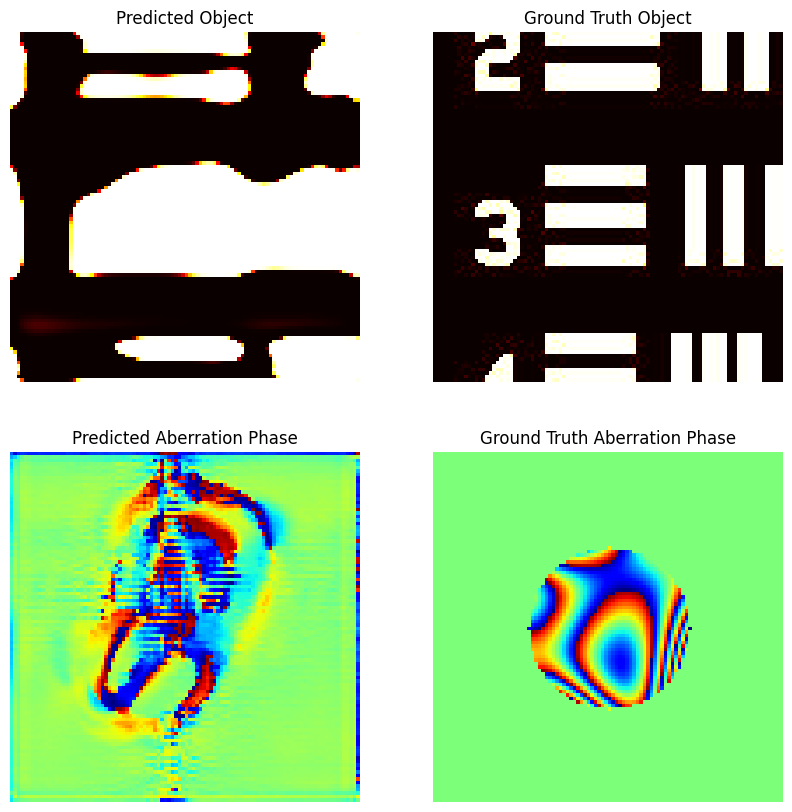

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
from IPython.display import clear_output
from google.colab import drive
drive.mount('/content/drive')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

#%% Parameters

lmb = 532e-9  # Wavelength in vacuum
k = 2.0 * torch.pi / lmb  # Wave vector
N = 100  # Number of pixels
L = 25e-6  # Detection field
n_basis = 437
batch_size = 20
lr = 0.001
num_epoch = 1000
alpha = 1.0  # Weight for object loss
beta = 1.0   # Weight for aberration loss

#%% FFT functions

def _FT(x):
    return torch.fft.ifftshift(torch.fft.fft2(torch.fft.fftshift(x)))

def _iFT(x):
    return torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(x)))

#%% Training Data - Google Drive

data_path = "/content/drive/MyDrive/"

os.chdir(data_path)

Input_ = np.load('input_data.npy')[0:n_basis]
Output_ = np.load('output_data.npy')

Input_ = torch.tensor(Input_, dtype=torch.complex64)
Output_ = torch.tensor(Output_, dtype=torch.complex64)

dataset = TensorDataset(Input_, Output_)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#%% Ground truth

Object_gt = np.array(Image.open('USAF1000.png').convert('L'))
Object_gt = Object_gt[(Object_gt.shape[0]-N)//2:(Object_gt.shape[0]+N)//2,
                      (Object_gt.shape[1]-N)//2:(Object_gt.shape[1]+N)//2]
Object_gt = torch.tensor(Object_gt, dtype=torch.float32) / 255.0  # Normalize to [0,1]

output_aberration_phase = np.loadtxt('output_aberration_phase.txt')
output_aberration_amp = np.loadtxt('output_aberration_amp.txt')
output_aberration_gt = output_aberration_amp * np.exp(1.0j * output_aberration_phase)
output_aberration_gt = torch.tensor(output_aberration_gt, dtype=torch.complex64)

#%% UNet implementation

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = nn.functional.pad(x1, [diffX // 2, diffX - diffX // 2,
                                    diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels, activation='sigmoid'):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.activation = activation
    def forward(self, x):
        x = self.conv(x)
        if self.activation == 'sigmoid':
            return torch.sigmoid(x)
        elif self.activation == 'tanh':
            return torch.tanh(x)
        else:
            return x

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True, activation='sigmoid'):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        self.activation = activation

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes, activation=self.activation)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

#%% Model

class UNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.object_net = UNet(n_channels=1, n_classes=1, activation='sigmoid')  # Object prediction
        self.aberration_net = UNet(n_channels=1, n_classes=2, activation=None)  # Aberration prediction (real and imaginary parts)

    def forward(self, E_in):
        # Object prediction
        E_in_amp = torch.abs(E_in).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        Object_pred = self.object_net(E_in_amp)  # Output: [batch_size, 1, N, N]
        Object_pred = Object_pred.squeeze(1)  # Shape: [batch_size, N, N]
        # Apply object to input field
        E = E_in * Object_pred
        # Fourier transform
        fE = _FT(E)
        # Aberration prediction
        fE_amp = torch.abs(fE).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        aberration_pred = self.aberration_net(fE_amp)  # Output: [batch_size, 2, N, N]
        real = aberration_pred[:, 0, :, :]
        imag = aberration_pred[:, 1, :, :]
        output_aberration_pred = torch.complex(real, imag)  # Shape: [batch_size, N, N]
        # Apply aberration
        fE = fE * output_aberration_pred
        # Inverse Fourier transform
        E_out = _iFT(fE)
        return E_out, Object_pred, output_aberration_pred

#%% Loss function

def loss_fn(E_out, E_true, Object_pred=None, Object_gt=None, output_aberration_pred=None, output_aberration_gt=None):
    loss = torch.mean(torch.abs(E_out - E_true)**2)
    if Object_pred is not None and Object_gt is not None:
        loss += alpha * torch.mean((Object_pred - Object_gt.to(device))**2)
    if output_aberration_pred is not None and output_aberration_gt is not None:
        loss += beta * torch.mean(torch.abs(output_aberration_pred - output_aberration_gt.to(device))**2)
    return loss

#%% Training loop

model = UNetModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_hist = []

for epoch in range(num_epoch):
    running_loss = 0.0
    for batch_idx, (E_in_batch, E_true_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        E_in_batch = E_in_batch.to(device)
        E_true_batch = E_true_batch.to(device)
        E_out_batch, Object_pred_batch, output_aberration_pred_batch = model(E_in_batch)
        loss = loss_fn(
            E_out_batch, E_true_batch,
            Object_pred=Object_pred_batch, Object_gt=Object_gt,
            output_aberration_pred=output_aberration_pred_batch, output_aberration_gt=output_aberration_gt
        )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_hist.append(running_loss / len(dataloader))
    print(f'Epoch {epoch + 1}/{num_epoch}, Loss: {running_loss / len(dataloader)}')

#%% Visualization

# Plot the overall loss history
plt.figure()
plt.plot(loss_hist)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot final predictions vs ground truth
model.eval()
with torch.no_grad():
    E_in_sample = Input_[0:1].to(device)
    E_true_sample = Output_[0:1].to(device)
    E_out_sample, Object_pred_sample, output_aberration_pred_sample = model(E_in_sample)

    # Predicted Object
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(Object_pred_sample.cpu().squeeze().numpy(), cmap='hot')
    plt.title('Predicted Object')
    plt.axis('off')

    # Ground Truth Object
    plt.subplot(2, 2, 2)
    plt.imshow(Object_gt.cpu().numpy(), cmap='hot')
    plt.title('Ground Truth Object')
    plt.axis('off')

    # Predicted Aberration
    pred_aberration_phase = torch.angle(output_aberration_pred_sample).cpu().squeeze().numpy()
    plt.subplot(2, 2, 3)
    plt.imshow(pred_aberration_phase, cmap='jet')
    plt.title('Predicted Aberration Phase')
    plt.axis('off')

    # Ground Truth Aberration
    gt_aberration_phase = torch.angle(output_aberration_gt).cpu().numpy()
    plt.subplot(2, 2, 4)
    plt.imshow(gt_aberration_phase, cmap='jet')
    plt.title('Ground Truth Aberration Phase')
    plt.axis('off')

    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Epoch 1/300, Loss: 15140.708718039772
Epoch 2/300, Loss: 15070.397416548296
Epoch 3/300, Loss: 15076.427734375
Epoch 4/300, Loss: 15062.767622514204
Epoch 5/300, Loss: 14975.942649147728
Epoch 6/300, Loss: 14545.408868963068
Epoch 7/300, Loss: 14210.429154829546
Epoch 8/300, Loss: 13795.674272017046
Epoch 9/300, Loss: 13762.998490767046
Epoch 10/300, Loss: 13440.29891690341
Epoch 11/300, Loss: 13461.280450994318
Epoch 12/300, Loss: 13043.914595170454
Epoch 13/300, Loss: 13284.73388671875
Epoch 14/300, Loss: 12810.24276455966
Epoch 15/300, Loss: 12459.259632457386
Epoch 16/300, Loss: 12083.877219460228
Epoch 17/300, Loss: 11752.91650390625
Epoch 18/300, Loss: 11493.283380681818
Epoch 19/300, Loss: 11138.568403764204
Epoch 20/300, Loss: 10988.261452414772
Epoch 21/300, Loss: 10486.610307173296
Epoch 22/300, Loss: 10297.592507102272
Epoch 23/3

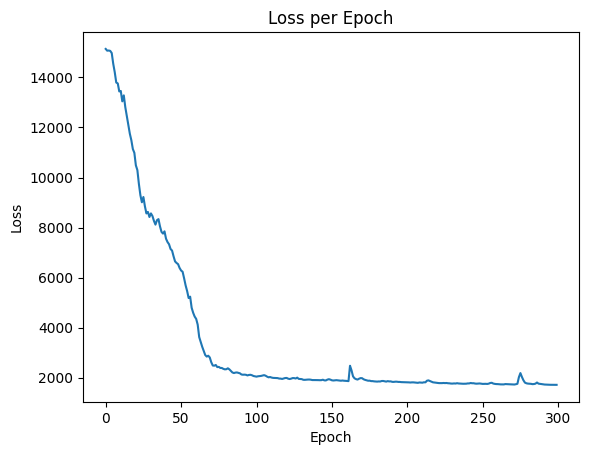

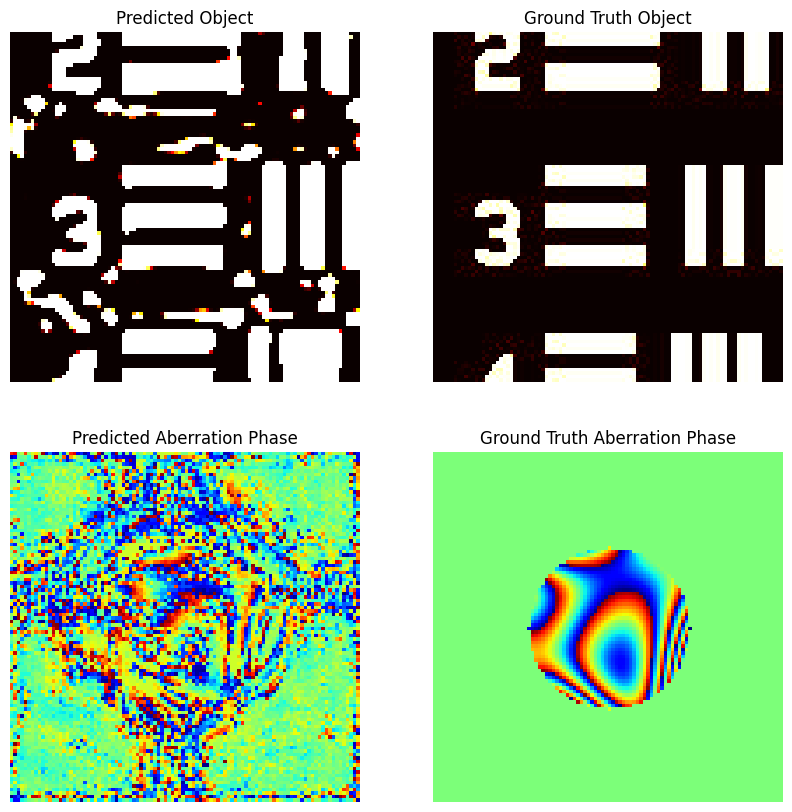

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
from IPython.display import clear_output
from google.colab import drive
drive.mount('/content/drive')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

#%% Parameters

lmb = 532e-9  # Wavelength in vacuum
k = 2.0 * torch.pi / lmb  # Wave vector
N = 100  # Number of pixels
L = 25e-6  # Detection field
n_basis = 437
batch_size = 20
lr = 0.001
num_epoch = 300
alpha = 1.0  # Weight for object loss
beta = 1.0   # Weight for aberration loss

#%% FFT functions

def _FT(x):
    return torch.fft.ifftshift(torch.fft.fft2(torch.fft.fftshift(x)))

def _iFT(x):
    return torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(x)))

#%% Training Data - Google Drive

data_path = "/content/drive/MyDrive/"

os.chdir(data_path)

Input_ = np.load('input_data.npy')[0:n_basis]
Output_ = np.load('output_data.npy')

Input_ = torch.tensor(Input_, dtype=torch.complex64)
Output_ = torch.tensor(Output_, dtype=torch.complex64)

dataset = TensorDataset(Input_, Output_)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#%% Ground truth

Object_gt = np.array(Image.open('USAF1000.png').convert('L'))
Object_gt = Object_gt[(Object_gt.shape[0]-N)//2:(Object_gt.shape[0]+N)//2,
                      (Object_gt.shape[1]-N)//2:(Object_gt.shape[1]+N)//2]
Object_gt = torch.tensor(Object_gt, dtype=torch.float32) / 255.0  # Normalize to [0,1]

output_aberration_phase = np.loadtxt('output_aberration_phase.txt')
output_aberration_amp = np.loadtxt('output_aberration_amp.txt')
output_aberration_gt = output_aberration_amp * np.exp(1.0j * output_aberration_phase)
output_aberration_gt = torch.tensor(output_aberration_gt, dtype=torch.complex64)

#%% UNet implementation

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = nn.functional.pad(x1, [diffX // 2, diffX - diffX // 2,
                                    diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels, activation='sigmoid'):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.activation = activation
    def forward(self, x):
        x = self.conv(x)
        if self.activation == 'sigmoid':
            return torch.sigmoid(x)
        elif self.activation == 'tanh':
            return torch.tanh(x)
        else:
            return x

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True, activation='sigmoid'):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        self.activation = activation

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes, activation=self.activation)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

#%% Model

class UNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.object_net = UNet(n_channels=1, n_classes=1, activation='sigmoid')  # Object prediction
        self.aberration_net = UNet(n_channels=1, n_classes=2, activation=None)  # Aberration prediction (real and imaginary parts)

    def forward(self, E_in):
        # Object prediction
        E_in_amp = torch.abs(E_in).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        Object_pred = self.object_net(E_in_amp)  # Output: [batch_size, 1, N, N]
        Object_pred = Object_pred.squeeze(1)  # Shape: [batch_size, N, N]
        # Apply object to input field
        E = E_in * Object_pred
        # Fourier transform
        fE = _FT(E)
        # Aberration prediction
        fE_amp = torch.abs(fE).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        aberration_pred = self.aberration_net(fE_amp)  # Output: [batch_size, 2, N, N]
        real = aberration_pred[:, 0, :, :]
        imag = aberration_pred[:, 1, :, :]
        output_aberration_pred = torch.complex(real, imag)  # Shape: [batch_size, N, N]
        # Apply aberration
        fE = fE * output_aberration_pred
        # Inverse Fourier transform
        E_out = _iFT(fE)
        return E_out, Object_pred, output_aberration_pred

#%% Loss function

def loss_fn(E_out, E_true, Object_pred=None, Object_gt=None, output_aberration_pred=None, output_aberration_gt=None):
    loss = torch.mean(torch.abs(E_out - E_true)**2)
    if Object_pred is not None and Object_gt is not None:
        loss += alpha * torch.mean((Object_pred - Object_gt.to(device))**2)
    if output_aberration_pred is not None and output_aberration_gt is not None:
        loss += beta * torch.mean(torch.abs(output_aberration_pred - output_aberration_gt.to(device))**2)
    return loss

#%% Training loop

model = UNetModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_hist = []

for epoch in range(num_epoch):
    running_loss = 0.0
    for batch_idx, (E_in_batch, E_true_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        E_in_batch = E_in_batch.to(device)
        E_true_batch = E_true_batch.to(device)
        E_out_batch, Object_pred_batch, output_aberration_pred_batch = model(E_in_batch)
        loss = loss_fn(
            E_out_batch, E_true_batch,
            Object_pred=Object_pred_batch, Object_gt=Object_gt,
            output_aberration_pred=output_aberration_pred_batch, output_aberration_gt=output_aberration_gt
        )
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_hist.append(running_loss / len(dataloader))
    print(f'Epoch {epoch + 1}/{num_epoch}, Loss: {running_loss / len(dataloader)}')

#%% Visualization

# Plot the overall loss history
plt.figure()
plt.plot(loss_hist)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot final predictions vs ground truth
model.eval()
with torch.no_grad():
    E_in_sample = Input_[0:1].to(device)
    E_true_sample = Output_[0:1].to(device)
    E_out_sample, Object_pred_sample, output_aberration_pred_sample = model(E_in_sample)

    # Predicted Object
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(Object_pred_sample.cpu().squeeze().numpy(), cmap='hot')
    plt.title('Predicted Object')
    plt.axis('off')

    # Ground Truth Object
    plt.subplot(2, 2, 2)
    plt.imshow(Object_gt.cpu().numpy(), cmap='hot')
    plt.title('Ground Truth Object')
    plt.axis('off')

    # Predicted Aberration
    pred_aberration_phase = torch.angle(output_aberration_pred_sample).cpu().squeeze().numpy()
    plt.subplot(2, 2, 3)
    plt.imshow(pred_aberration_phase, cmap='jet')
    plt.title('Predicted Aberration Phase')
    plt.axis('off')

    # Ground Truth Aberration
    gt_aberration_phase = torch.angle(output_aberration_gt).cpu().numpy()
    plt.subplot(2, 2, 4)
    plt.imshow(gt_aberration_phase, cmap='jet')
    plt.title('Ground Truth Aberration Phase')
    plt.axis('off')

    plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Epoch 1/50, Loss: 15088.430974786932
Epoch 2/50, Loss: 15074.516645951704
Epoch 3/50, Loss: 15072.972301136364
Epoch 4/50, Loss: 15071.19393643466
Epoch 5/50, Loss: 15035.088734019886
Epoch 6/50, Loss: 14782.684348366478
Epoch 7/50, Loss: 14142.253684303978
Epoch 8/50, Loss: 13567.17684659091
Epoch 9/50, Loss: 13401.60555752841
Epoch 10/50, Loss: 13617.726606889204
Epoch 11/50, Loss: 12760.663929332386
Epoch 12/50, Loss: 12367.768687855114
Epoch 13/50, Loss: 11891.061257102272
Epoch 14/50, Loss: 11200.14120205966
Epoch 15/50, Loss: 11444.57120028409
Epoch 16/50, Loss: 10754.772638494318
Epoch 17/50, Loss: 10395.22207919034
Epoch 18/50, Loss: 10636.284889914772
Epoch 19/50, Loss: 9913.865012428978
Epoch 20/50, Loss: 9242.309126420454
Epoch 21/50, Loss: 9202.30331143466
Epoch 22/50, Loss: 8270.190229936079
Epoch 23/50, Loss: 8255.014825994318

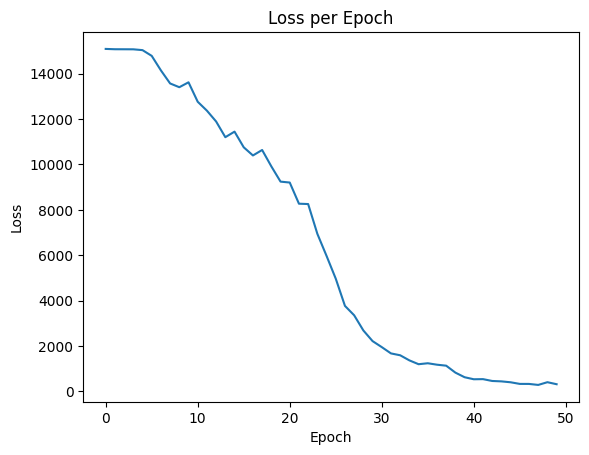

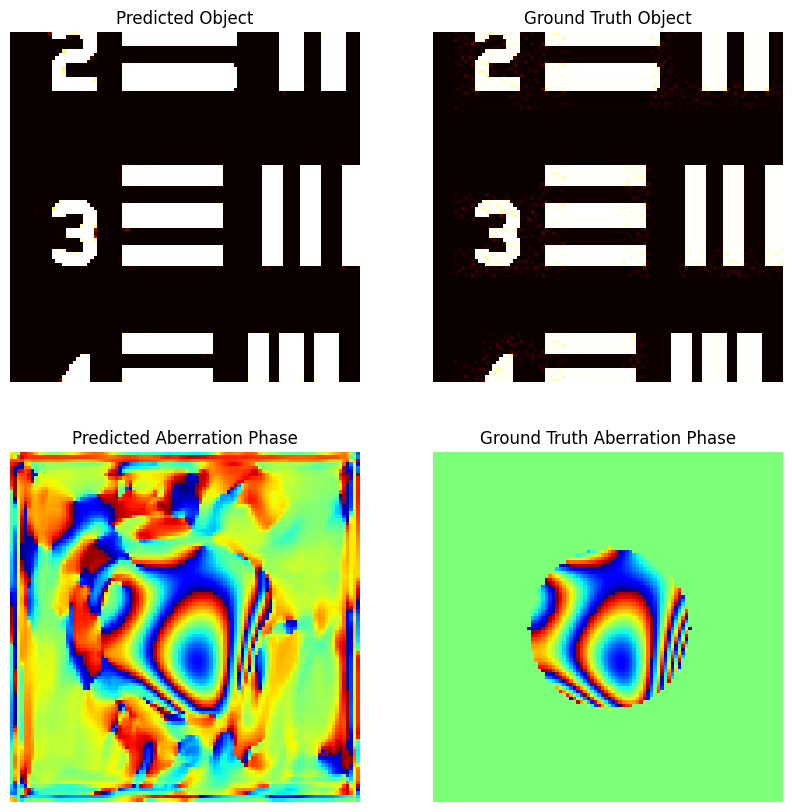

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
from IPython.display import clear_output
from google.colab import drive
drive.mount('/content/drive')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

#%% Parameters

lmb = 532e-9  # Wavelength in vacuum
k = 2.0 * torch.pi / lmb  # Wave vector
N = 100  # Number of pixels
L = 25e-6  # Detection field
n_basis = 437
batch_size = 20
lr = 0.02
num_epoch = 50
R1 = 1e-3

#%% FFT functions

def _FT(x):
    return torch.fft.ifftshift(torch.fft.fft2(torch.fft.fftshift(x)))

def _iFT(x):
    return torch.fft.ifftshift(torch.fft.ifft2(torch.fft.fftshift(x)))

#%% Training Data - Google Drive

data_path = "/content/drive/MyDrive/"

os.chdir(data_path)

Input_ = np.load('input_data.npy')[0:n_basis]
Output_ = np.load('output_data.npy')

Input_ = torch.tensor(Input_, dtype=torch.complex64)
Output_ = torch.tensor(Output_, dtype=torch.complex64)

dataset = TensorDataset(Input_, Output_)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#%% Ground truth

Object_gt = np.array(Image.open('USAF1000.png').convert('L'))
Object_gt = Object_gt[(Object_gt.shape[0]-N)//2:(Object_gt.shape[0]+N)//2,
                      (Object_gt.shape[1]-N)//2:(Object_gt.shape[1]+N)//2]
Object_gt = torch.tensor(Object_gt, dtype=torch.float32) / 255.0  # Normalize to [0,1]

output_aberration_phase = np.loadtxt('output_aberration_phase.txt')
output_aberration_amp = np.loadtxt('output_aberration_amp.txt')
output_aberration_gt = output_aberration_amp * np.exp(1.0j * output_aberration_phase)
output_aberration_gt = torch.tensor(output_aberration_gt, dtype=torch.complex64)

#%% UNet implementation

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling with maxpool then double conv"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling then double conv"""
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)
    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = nn.functional.pad(x1, [diffX // 2, diffX - diffX // 2,
                                    diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels, activation='sigmoid'):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.activation = activation
    def forward(self, x):
        x = self.conv(x)
        if self.activation == 'sigmoid':
            return torch.sigmoid(x)
        elif self.activation == 'tanh':
            return torch.tanh(x)
        else:
            return x

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True, activation='sigmoid'):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        self.activation = activation

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes, activation=self.activation)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

#%% Model

class UNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.object_net = UNet(n_channels=1, n_classes=1, activation='sigmoid')  # Object prediction
        self.aberration_net = UNet(n_channels=1, n_classes=2, activation=None)  # Aberration prediction (real and imaginary parts)

    def forward(self, E_in):
        # Object prediction
        E_in_amp = torch.abs(E_in).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        Object_pred = self.object_net(E_in_amp)  # Output: [batch_size, 1, N, N]
        Object_pred = Object_pred.squeeze(1)  # Shape: [batch_size, N, N]
        # Apply object to input field
        E = E_in * Object_pred
        # Fourier transform
        fE = _FT(E)
        # Aberration prediction
        fE_amp = torch.abs(fE).unsqueeze(1)  # Shape: [batch_size, 1, N, N]
        aberration_pred = self.aberration_net(fE_amp)  # Output: [batch_size, 2, N, N]
        real = aberration_pred[:, 0, :, :]
        imag = aberration_pred[:, 1, :, :]
        output_aberration_pred = torch.complex(real, imag)  # Shape: [batch_size, N, N]
        # Apply aberration
        fE = fE * output_aberration_pred
        # Inverse Fourier transform
        E_out = _iFT(fE)
        return E_out, Object_pred, output_aberration_pred

#%% Loss function

def loss_fn(E_out, E_true, output_aberration_pred=None):
    # 1. Calculate the standard MSE loss between the predicted and ground truth outputs
    mse_loss = torch.mean(torch.abs(E_out - E_true)**2)

    # 2. Calculate the gradient of output aberration (if provided)
    if output_aberration_pred is not None:
        grad_output_aberration = torch.gradient(output_aberration_pred)
        grad_norm = sum(torch.abs(g)**2 for g in grad_output_aberration)  # Compute the norm of gradients
        mse_loss += R1 * torch.mean(grad_norm)  # Add the gradient norm to the loss

    return mse_loss


#%% Training loop

model = UNetModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_hist = []

for epoch in range(num_epoch):
    running_loss = 0.0
    for batch_idx, (E_in_batch, E_true_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        E_in_batch = E_in_batch.to(device)
        E_true_batch = E_true_batch.to(device)
        E_out_batch, Object_pred_batch, output_aberration_pred_batch = model(E_in_batch)
        loss = loss_fn(E_out_batch, E_true_batch)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_hist.append(running_loss / len(dataloader))
    print(f'Epoch {epoch + 1}/{num_epoch}, Loss: {running_loss / len(dataloader)}')

#%% Visualization

# Plot the overall loss history
plt.figure()
plt.plot(loss_hist)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot final predictions vs ground truth
model.eval()
with torch.no_grad():
    E_in_sample = Input_[0:1].to(device)
    E_true_sample = Output_[0:1].to(device)
    E_out_sample, Object_pred_sample, output_aberration_pred_sample = model(E_in_sample)

    # Predicted Object
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(Object_pred_sample.cpu().squeeze().numpy(), cmap='hot')
    plt.title('Predicted Object')
    plt.axis('off')

    # Ground Truth Object
    plt.subplot(2, 2, 2)
    plt.imshow(Object_gt.cpu().numpy(), cmap='hot')
    plt.title('Ground Truth Object')
    plt.axis('off')

    # Predicted Aberration
    pred_aberration_phase = torch.angle(output_aberration_pred_sample).cpu().squeeze().numpy()
    plt.subplot(2, 2, 3)
    plt.imshow(pred_aberration_phase, cmap='jet')
    plt.title('Predicted Aberration Phase')
    plt.axis('off')

    # Ground Truth Aberration
    gt_aberration_phase = torch.angle(output_aberration_gt).cpu().numpy()
    plt.subplot(2, 2, 4)
    plt.imshow(gt_aberration_phase, cmap='jet')
    plt.title('Ground Truth Aberration Phase')
    plt.axis('off')

    plt.show()